# cfDNA fragmentation data analysis


## Data Preparation

In [1]:
import numpy as np
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
print('Numpy version is ' + str(np.__version__))

import pandas as pd
print('Pandas version is ' + str(pd.__version__))

import matplotlib
from matplotlib import pyplot as plt
print('Matplotlib version is ' + str(matplotlib.__version__))

import seaborn as sns
print('Seaborn version is ' + str(sns.__version__))


import scipy
from scipy.stats import kstest
print('Scipy version is ' + str(scipy.__version__))

from Frag_Ex_Imm_Func import *


Numpy version is 1.23.4
Pandas version is 1.4.2
Matplotlib version is 3.5.1


/Users/terencetsuiholung/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Seaborn version is 0.11.2
Scipy version is 1.7.3


### Generating List of Sample IDs

In [2]:
df=pd.read_csv("../DATA/mtDNA_modeling_data.csv")
display(df)
id_list = df.id.unique()
id_order = [3,4,5,6,7,8,9,10,11,12,0,1,2]
id_list=[id_list[i] for i in id_order]
print(f'Sample id: {id_list}')

Unnamed: 0          id   chr  length  freq     study  \
0               0    HU005.10  gDNA      43    10  nanopore   
1               1    HU005.10  gDNA      45    28  nanopore   
2               2    HU005.10  gDNA      46    33  nanopore   
3               3    HU005.10  gDNA      47    37  nanopore   
4               4    HU005.10  gDNA      48    60  nanopore   
...           ...         ...   ...     ...   ...       ...   
68806       68806  ISPRO.bc11  gDNA    7715     1  nanopore   
68807       68807  ISPRO.bc11  gDNA    7897     1  nanopore   
68808       68808  ISPRO.bc11  gDNA    8555     1  nanopore   
68809       68809  ISPRO.bc11  gDNA    8703     1  nanopore   
68810       68810  ISPRO.bc11  gDNA    9866     1  nanopore   

                 condition detail specimen  
0          Healthy control    ONT   Plasma  
1          Healthy control    ONT   Plasma  
2          Healthy control    ONT   Plasma  
3          Healthy control    ONT   Plasma  
4          Healthy control    ONT   Plasma  
...                    ...    ...      ...  
68806  Lung adenocarcinoma    ONT   Plasma  
68807  Lung adenocarcinoma    ONT   Plasma  
68808  Lung adenocarcinoma    ONT   Plasma  
68809  Lung adenocarcinoma    ONT   Plasma  
68810  Lung adenocarcinoma    ONT   Plasma  

[68811 rows x 9 columns]

Sample id: ['ISPRO.S1', 'ISPRO.bc01', 'ISPRO.bc02', 'ISPRO.bc03', 'ISPRO.bc04', 'ISPRO.bc05', 'ISPRO.bc08', 'ISPRO.bc09', 'ISPRO.bc10', 'ISPRO.bc11', 'HU005.10', 'HU005.11', 'HU005.12']


### Storing probability distribution

In [3]:
prob_list = []
for id in id_list:
    df_id = df[df['id']==id]
    df_id_total = df_id['freq'].to_numpy().sum()
    df_id['prob']=df_id['freq']/df_id_total
    prob_list = prob_list + list(df_id['prob'].to_numpy())
df['prob']=prob_list
df['prob x10e6'] = df['prob']*10**6

/var/folders/dx/942l9g7s23b3wvb64nkf4yrw0000gn/T/ipykernel_18666/1061701478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id['prob']=df_id['freq']/df_id_total
/var/folders/dx/942l9g7s23b3wvb64nkf4yrw0000gn/T/ipykernel_18666/1061701478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id['prob']=df_id['freq']/df_id_total
/var/folders/dx/942l9g7s23b3wvb64nkf4yrw0000gn/T/ipykernel_18666/1061701478.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

### Splitting Dataset into mtDNA and gDNA dataset

First we split our dataset into two parts, gDNA dataset and mtDNA dataset.

For the mtDNA dataset, since all fragment reads are small, we group fragment together by length groups.
We then divide the aggregrated count by the group length size to give the count per base pair.


In [4]:
df_chrM = df[df['chr']=='chrM']
len_grp_size = 1
chrM_bins=np.linspace(0,16500,int(16500/len_grp_size)+1)
df_chrM['length_group']=np.digitize(df_chrM['length'].to_numpy(),chrM_bins, right=True)*len_grp_size
df_chrM = df_chrM.groupby(["id","chr","length_group","study","condition","detail","specimen"], as_index = False)[["freq","prob"]].sum()
df_chrM["count per b.p."]=df_chrM["freq"]/len_grp_size
df_chrM=df_chrM.sort_values(by=['id','chr','length_group'])
#df_agg["log length frequency"]= np.log(df_agg["freq"].to_numpy())
#df_agg["log length"]= np.log(df_agg["length_group"].to_numpy())
#df_agg= df_agg[df_agg['length_group']<=10000]
#df_chrM = df_chrM[df_chrM["freq"]>=2]
print('Mitochondrial DNA Dataset:')
display(df_chrM)


Mitochondrial DNA Dataset:


/var/folders/dx/942l9g7s23b3wvb64nkf4yrw0000gn/T/ipykernel_18666/745998297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chrM['length_group']=np.digitize(df_chrM['length'].to_numpy(),chrM_bins, right=True)*len_grp_size


id   chr  length_group     study            condition detail  \
0       HU005.10  chrM            58  nanopore      Healthy control    ONT   
1       HU005.10  chrM            65  nanopore      Healthy control    ONT   
2       HU005.10  chrM            72  nanopore      Healthy control    ONT   
3       HU005.10  chrM            73  nanopore      Healthy control    ONT   
4       HU005.10  chrM            74  nanopore      Healthy control    ONT   
...          ...   ...           ...       ...                  ...    ...   
7233  ISPRO.bc11  chrM          7586  nanopore  Lung adenocarcinoma    ONT   
7234  ISPRO.bc11  chrM          8959  nanopore  Lung adenocarcinoma    ONT   
7235  ISPRO.bc11  chrM          9433  nanopore  Lung adenocarcinoma    ONT   
7236  ISPRO.bc11  chrM         10121  nanopore  Lung adenocarcinoma    ONT   
7237  ISPRO.bc11  chrM         10348  nanopore  Lung adenocarcinoma    ONT   

     specimen  freq          prob  count per b.p.  
0      Plasma     1  1.006033e-06             1.0  
1      Plasma     1  1.131788e-06             1.0  
2      Plasma     2  5.658938e-07             2.0  
3      Plasma     1  4.401396e-07             1.0  
4      Plasma     1  6.916480e-07             1.0  
...       ...   ...           ...             ...  
7233   Plasma     1  5.942512e-07             1.0  
7234   Plasma     1  5.942512e-07             1.0  
7235   Plasma     1  5.942512e-07             1.0  
7236   Plasma     1  5.942512e-07             1.0  
7237   Plasma     1  5.942512e-07             1.0  

[7238 rows x 10 columns]

In [5]:
df_mtDNA = df[df['chr']=='chrM']
len_grp_size = 10
mtDNA_bins=np.linspace(0,16500,int(16500/len_grp_size)+1)
df_mtDNA['length_group']=np.digitize(df_mtDNA['length'].to_numpy(),mtDNA_bins, right=True)*len_grp_size
df_mtDNA = df_mtDNA.groupby(["id","chr","length_group","study","condition","detail","specimen"], as_index = False)[["freq","prob"]].sum()
df_mtDNA["count per b.p."]=df_mtDNA["freq"]/len_grp_size
df_mtDNA=df_mtDNA.sort_values(by=['id','chr','length_group'])
#df_agg["log length frequency"]= np.log(df_agg["freq"].to_numpy())
#df_agg["log length"]= np.log(df_agg["length_group"].to_numpy())
#df_agg= df_agg[df_agg['length_group']<=10000]
#df_chrM = df_chrM[df_chrM["freq"]>=2]
print('Binned Mitochondrial DNA Dataset:')
display(df_mtDNA)


Binned Mitochondrial DNA Dataset:


/var/folders/dx/942l9g7s23b3wvb64nkf4yrw0000gn/T/ipykernel_18666/620476155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mtDNA['length_group']=np.digitize(df_mtDNA['length'].to_numpy(),mtDNA_bins, right=True)*len_grp_size


id   chr  length_group     study            condition detail  \
0       HU005.10  chrM            60  nanopore      Healthy control    ONT   
1       HU005.10  chrM            70  nanopore      Healthy control    ONT   
2       HU005.10  chrM            80  nanopore      Healthy control    ONT   
3       HU005.10  chrM            90  nanopore      Healthy control    ONT   
4       HU005.10  chrM           100  nanopore      Healthy control    ONT   
...          ...   ...           ...       ...                  ...    ...   
2877  ISPRO.bc11  chrM          7590  nanopore  Lung adenocarcinoma    ONT   
2878  ISPRO.bc11  chrM          8960  nanopore  Lung adenocarcinoma    ONT   
2879  ISPRO.bc11  chrM          9440  nanopore  Lung adenocarcinoma    ONT   
2880  ISPRO.bc11  chrM         10130  nanopore  Lung adenocarcinoma    ONT   
2881  ISPRO.bc11  chrM         10350  nanopore  Lung adenocarcinoma    ONT   

     specimen  freq          prob  count per b.p.  
0      Plasma     1  1.006033e-06             0.1  
1      Plasma     1  1.131788e-06             0.1  
2      Plasma     6  3.395363e-06             0.6  
3      Plasma     9  5.847569e-06             0.9  
4      Plasma    14  6.350586e-06             1.4  
...       ...   ...           ...             ...  
2877   Plasma     1  5.942512e-07             0.1  
2878   Plasma     1  5.942512e-07             0.1  
2879   Plasma     1  5.942512e-07             0.1  
2880   Plasma     1  5.942512e-07             0.1  
2881   Plasma     1  5.942512e-07             0.1  

[2882 rows x 10 columns]

In [6]:
df_gDNA = df[df['chr']=='gDNA']
#df_gDNA = df_gDNA[df_gDNA['freq']>=2].copy()
df_gDNA_full = df_gDNA.copy()

gDNA_bin = [0, 250] + [int(x) for x in range(420, 16500, 200)]
print(gDNA_bin)
gDNA_width = np.diff(gDNA_bin)
list = gDNA_bin +[16500]

df_gDNA = df_gDNA[df_gDNA['length']<=16500] #only consider fragments with length less than 200 b.p.
df_gDNA['length_group']=[(list[int(x)-1]+list[int(x)])/2 for x in np.digitize(df_gDNA['length'].to_numpy(),gDNA_bin, right=True)]
df_gDNA['length_interval']=[str([list[int(x)-1],list[int(x)]]) for x in np.digitize(df_gDNA['length'].to_numpy(),gDNA_bin, right=True)]
df_gDNA['length_width']=[list[int(x)]-list[int(x)-1] for x in np.digitize(df_gDNA['length'].to_numpy(),gDNA_bin, right=True)]

df_gDNA = df_gDNA.groupby(["id","chr","length_group","length_interval","study","condition","detail","specimen","length_width"], as_index = False)[["freq","prob"]].sum()
df_gDNA["count per b.p."]=df_chrM["freq"]
df_gDNA=df_gDNA.sort_values(by=['id','chr','length_group'])

print('Genomic DNA Dataset:')
display(df_gDNA)
display(df_gDNA_full)

[0, 250, 420, 620, 820, 1020, 1220, 1420, 1620, 1820, 2020, 2220, 2420, 2620, 2820, 3020, 3220, 3420, 3620, 3820, 4020, 4220, 4420, 4620, 4820, 5020, 5220, 5420, 5620, 5820, 6020, 6220, 6420, 6620, 6820, 7020, 7220, 7420, 7620, 7820, 8020, 8220, 8420, 8620, 8820, 9020, 9220, 9420, 9620, 9820, 10020, 10220, 10420, 10620, 10820, 11020, 11220, 11420, 11620, 11820, 12020, 12220, 12420, 12620, 12820, 13020, 13220, 13420, 13620, 13820, 14020, 14220, 14420, 14620, 14820, 15020, 15220, 15420, 15620, 15820, 16020, 16220, 16420]
Genomic DNA Dataset:


id   chr  length_group length_interval     study  \
0      HU005.10  gDNA         125.0        [0, 250]  nanopore   
1      HU005.10  gDNA         335.0      [250, 420]  nanopore   
2      HU005.10  gDNA         520.0      [420, 620]  nanopore   
3      HU005.10  gDNA         720.0      [620, 820]  nanopore   
4      HU005.10  gDNA         920.0     [820, 1020]  nanopore   
..          ...   ...           ...             ...       ...   
899  ISPRO.bc11  gDNA       11520.0  [11420, 11620]  nanopore   
900  ISPRO.bc11  gDNA       11720.0  [11620, 11820]  nanopore   
901  ISPRO.bc11  gDNA       13720.0  [13620, 13820]  nanopore   
902  ISPRO.bc11  gDNA       14320.0  [14220, 14420]  nanopore   
903  ISPRO.bc11  gDNA       16320.0  [16220, 16420]  nanopore   

               condition detail specimen  length_width     freq          prob  \
0        Healthy control    ONT   Plasma           250  1811958  8.021594e-01   
1        Healthy control    ONT   Plasma           170   278557  1.383692e-01   
2        Healthy control    ONT   Plasma           200    50695  3.662836e-02   
3        Healthy control    ONT   Plasma           200    11518  1.087686e-02   
4        Healthy control    ONT   Plasma           200     3560  3.899574e-03   
..                   ...    ...      ...           ...      ...           ...   
899  Lung adenocarcinoma    ONT   Plasma           200        2  1.782754e-06   
900  Lung adenocarcinoma    ONT   Plasma           200        2  2.377005e-06   
901  Lung adenocarcinoma    ONT   Plasma           200        1  5.942512e-07   
902  Lung adenocarcinoma    ONT   Plasma           200        1  5.942512e-07   
903  Lung adenocarcinoma    ONT   Plasma           200        1  1.188502e-06   

     count per b.p.  
0                 1  
1                 1  
2                 2  
3                 1  
4                 1  
..              ...  
899               3  
900               2  
901               3  
902               1  
903               2  

[904 rows x 12 columns]

Unnamed: 0          id   chr  length  freq     study  \
0               0    HU005.10  gDNA      43    10  nanopore   
1               1    HU005.10  gDNA      45    28  nanopore   
2               2    HU005.10  gDNA      46    33  nanopore   
3               3    HU005.10  gDNA      47    37  nanopore   
4               4    HU005.10  gDNA      48    60  nanopore   
...           ...         ...   ...     ...   ...       ...   
68806       68806  ISPRO.bc11  gDNA    7715     1  nanopore   
68807       68807  ISPRO.bc11  gDNA    7897     1  nanopore   
68808       68808  ISPRO.bc11  gDNA    8555     1  nanopore   
68809       68809  ISPRO.bc11  gDNA    8703     1  nanopore   
68810       68810  ISPRO.bc11  gDNA    9866     1  nanopore   

                 condition detail specimen          prob  prob x10e6  
0          Healthy control    ONT   Plasma  4.401396e-07    0.440140  
1          Healthy control    ONT   Plasma  1.068911e-06    1.068911  
2          Healthy control    ONT   Plasma  8.802793e-07    0.880279  
3          Healthy control    ONT   Plasma  1.634804e-06    1.634804  
4          Healthy control    ONT   Plasma  1.194665e-06    1.194665  
...                    ...    ...      ...           ...         ...  
68806  Lung adenocarcinoma    ONT   Plasma  5.942512e-07    0.594251  
68807  Lung adenocarcinoma    ONT   Plasma  5.942512e-07    0.594251  
68808  Lung adenocarcinoma    ONT   Plasma  5.942512e-07    0.594251  
68809  Lung adenocarcinoma    ONT   Plasma  5.942512e-07    0.594251  
68810  Lung adenocarcinoma    ONT   Plasma  5.942512e-07    0.594251  

[61571 rows x 11 columns]

## mtDNA Fragment Profile Curve-fitting analysis

First we identify the samples with more than 200 observed fragments. We will only study these samples.

In [7]:
mtDNA_id = []
mtDNA_health = []
for id in id_list:
    #id = 'ISPRO.bc05'
    clin_data = df_chrM[df_chrM['id']==id] #chrM
    health = clin_data['condition'].iloc[0]
    x = clin_data['length_group'].to_numpy()
    x= np.append([0],x)
    y = np.cumsum(clin_data['freq'].to_numpy())
    if y[-1] >= 200:
        #print(id, y[-1], clin_data['condition'])
        mtDNA_id += [id]
        mtDNA_health += [health]    
print(f'ID list: {mtDNA_id}')
print(f'Health condition: {mtDNA_health}')

ID list: ['ISPRO.S1', 'ISPRO.bc01', 'ISPRO.bc02', 'ISPRO.bc03', 'ISPRO.bc04', 'ISPRO.bc05', 'ISPRO.bc11', 'HU005.10', 'HU005.11']
Health condition: ['Lung adenocarcinoma', 'Lung adenocarcinoma', 'Healthy control', 'Healthy control', 'Healthy control', 'Healthy control', 'Lung adenocarcinoma', 'Healthy control', 'Healthy control']


### Fragment Profile Visualisation and Curve Fitting
Here, we visualise the fragment profile. We introduce a cut-off to discard the longest 5% of fragments to reduce noisy data from inaccurate sampling of large fragments.

Furthermore, we linearly interpolate the cumulative count to create a smoother fragment profile.

We can see that all fragment profiles start to decrease around 120-150 b.p.. This suggests that fragments start to exit the system once they are within this region.

We also find the best fit curve for the decreasing part of the fragment profiles by fitting a linear model on the log-log scale.

ISPRO.S1 [370.30976744]
-0.6908030350828819 6.784262717620279
ISPRO.bc01 [130.21812081]
-2.502358609845376 16.023320270906108
ISPRO.bc02 [140.15360502]
-1.3531999639145622 9.06002791256066
ISPRO.bc03 [150.17017828]
-1.3618472468972278 9.784625526912809
ISPRO.bc04 [180.21231979]
-1.2227719992852941 7.857835218482403
ISPRO.bc05 [120.06469003]
-1.1001057040634385 7.898730813972218
ISPRO.bc11 [130.0887372]
-1.806439366469611 11.577203172654237
HU005.10 [130.33333333]
-2.4463333938527345 14.641809839890417
HU005.11 [310.13716814]
-1.5745341472947225 9.680658477344378


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[-0.69080304  6.78426272]
 [-2.50235861 16.02332027]
 [-1.35319996  9.06002791]
 [-1.36184725  9.78462553]
 [-1.222772    7.85783522]
 [-1.1001057   7.89873081]
 [-1.80643937 11.57720317]
 [-2.44633339 14.64180984]
 [-1.57453415  9.68065848]]


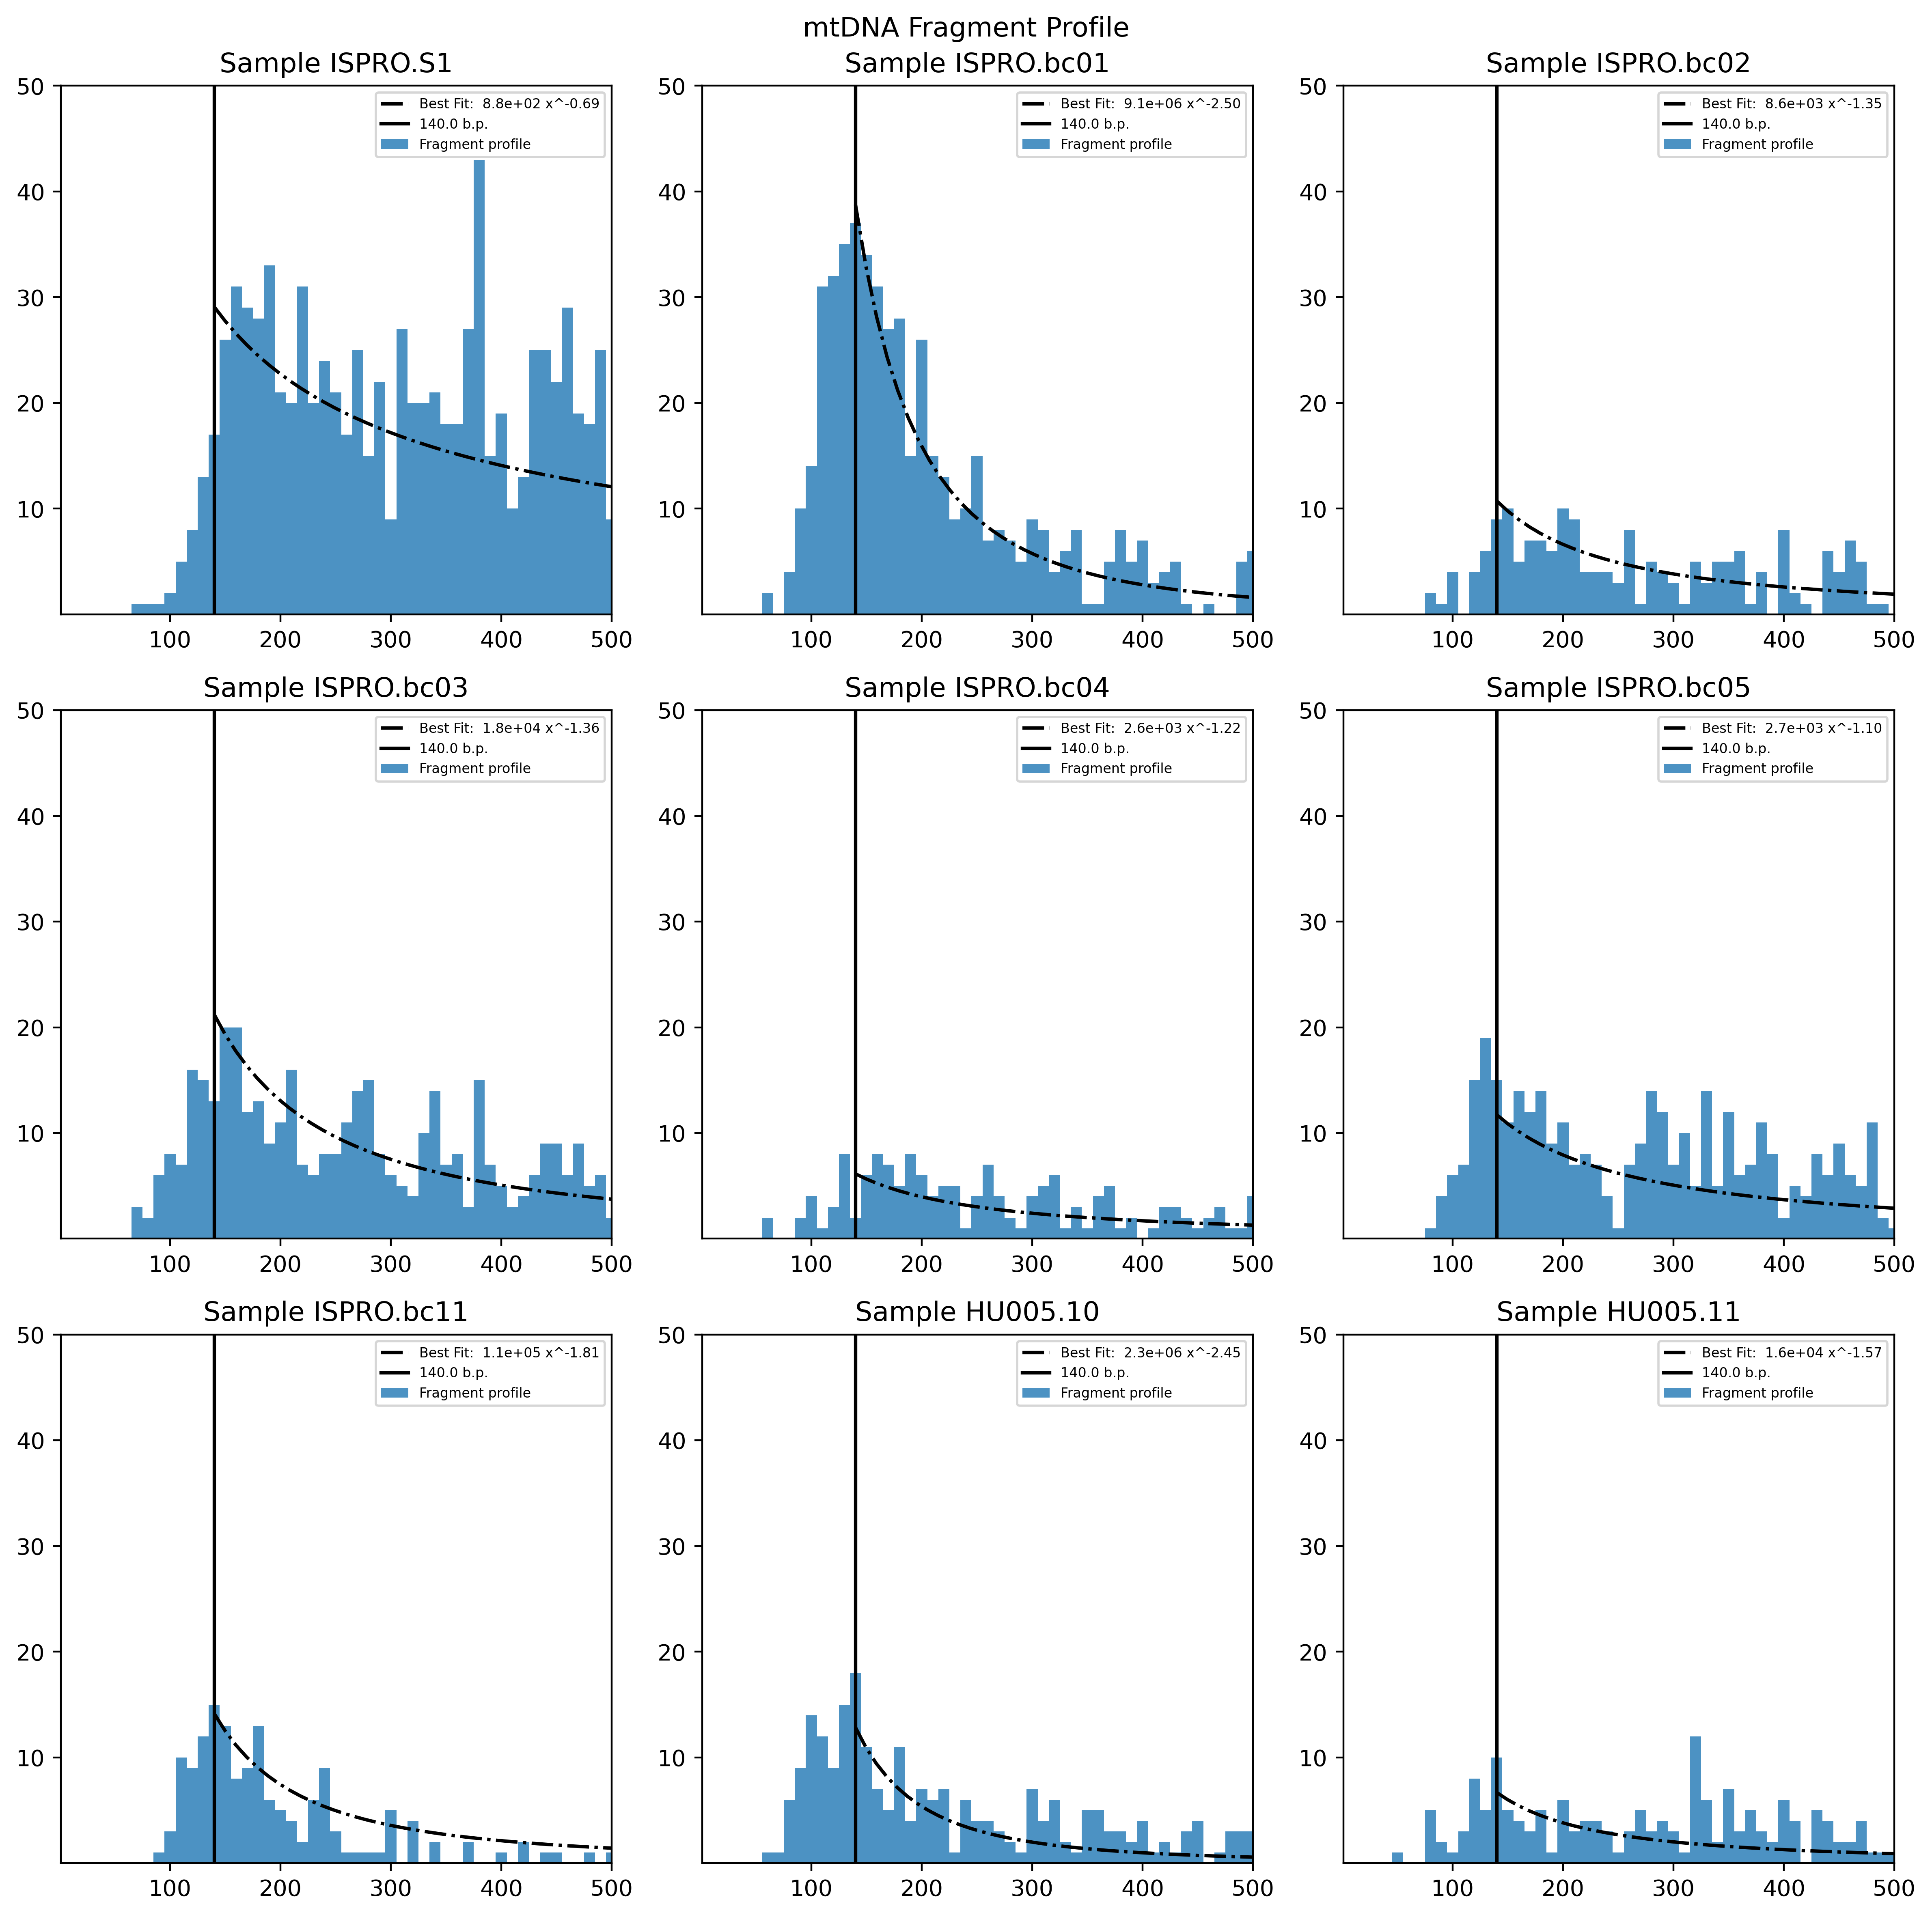

In [8]:
import scipy.interpolate
n = len(mtDNA_id)
fig, ax = plt.subplots(3,3,figsize= (12,12), dpi=400)
counter = 0
bf_coeff = np.zeros((n,2))
low_cutoff=np.ones(n)*140
best_fit_stats = []
for id in mtDNA_id:
    clin_data_binned = df_mtDNA[df_mtDNA['id']==id]
    mtDNA_bins = clin_data_binned['length_group'].to_numpy()
    y_count = clin_data_binned['freq'].to_numpy()
    ax[int(counter/3),counter%3].bar(mtDNA_bins, y_count, width=10, alpha=0.8, label='Fragment profile')
##############################Linear interpolation of fragment counts to provide best fit coefficients that account for 0 counts #####################################################    
    clin_data = df_chrM[df_chrM['id']==id] 
    x = clin_data['length_group'].to_numpy()
    x= np.append([0],x)
    y = np.cumsum(clin_data['freq'].to_numpy())
    y = np.append([0],y)
    cum_count = np.stack([x,y], axis=0)
    y_interp = scipy.interpolate.interp1d(cum_count[0,:], cum_count[1,:])
    up_idx = np.where(y > np.percentile(y,95))[0].min()
    frag_cutoff = x[up_idx]
    x_axis = np.linspace(0,frag_cutoff,int(frag_cutoff/10)+1)
    y_int = y_interp(x_axis)
    y_lim = y_int[-1]*1.5
    #ax[1,counter].plot(x_axis,y_int, color = 'k', label='linear interpolation')
    #ax[1,counter].bar(x[:up_idx],y[:up_idx],width=10, alpha=0.5, label='cumulative count')
    #ax[1, counter].legend(loc='upper left',fontsize=6)
    #ax[1, counter].set_ylim([0,y_lim])
    freq_int = np.diff(y_int)
    x_max = x_axis[np.where(freq_int == np.max(freq_int))[0]]
    print(id, x_max)
    peak = low_cutoff[counter]
    x_tail = np.linspace(peak,frag_cutoff,int(frag_cutoff/10)+1)
    y_tail = y_interp(x_tail)  
    log_den_trans = np.log(np.diff(y_tail))-np.log(np.diff(y_tail))[0]  #shifting the density point at B_ex to origin
    log_x_axis_trans = np.log(x_tail[1:]) - np.log(x_tail[1]) #shifting the point to origin
    lm = LinearRegression(fit_intercept = False) #apply a linear model with no intercept fit
    lm.fit(log_x_axis_trans.reshape(-1, 1), log_den_trans)
    [m] = lm.coef_
    c = np.log(np.diff(y_tail))[0] - m * np.log(x_tail[1])
    bf_coeff[counter,:] = [m,c]
    print(m,c)
    #plt.plot(x,y/y[-1], label=f'CDF for {id}')
    #plt.title(f'Cumulative Fragment Count for Patients mtDNA')
    #plt.xlabel('Fragment Length (b.p.)')
    #plt.ylabel('Fragment Count')
    #print(np.linspace(0,8000,801),y_int)
    #plt.plot(x,y, label=f'Id: {id}')
    #ax[0, counter].plot(x,y, label=f'Cumulative count')
    #ax[0,counter].set_title(f'Cumulative count, Sample {id}')
    #ax[counter].set_xscale('log')
    #ax[counter].set_yscale('log')
    ax[int(counter/3),counter%3].set_ylim([0.01,50])
    ax[int(counter/3),counter%3].set_xlim([1,500])
    ax[int(counter/3),counter%3].plot(x_tail, np.exp(c)*x_tail**m, label=f'Best Fit: {np.exp(c): .1e} x^{m: .2f}', color='k', linestyle='-.')
    ax[int(counter/3),counter%3].set_title(f'Sample {id}')
    #ax[counter].set_xlim([100,frag_cutoff])
    ax[int(counter/3),counter%3].axvline(peak, label=f'{peak} b.p.', color='k')
    ax[int(counter/3),counter%3].legend(loc='upper right',fontsize=6)
 
    fig.tight_layout()
    best_fit_stats += [[mtDNA_health[counter], id, m,c]]
    counter +=1
    fig.suptitle('mtDNA Fragment Profile')


fig.savefig('../Clinical Data Analysis/Population Plot/mtDNA_frag_prof_nanopore.eps')
fig.savefig('../Clinical Data Analysis/Population Plot/mtDNA_frag_prof_nanopore.png')
fig.savefig('../Clinical Data Analysis/Population Plot/mtDNA_frag_prof_nanopore.pdf')

#fig.savefig('../Clinical Data Analysis/Population Plot/mtDNA_frag_prof_nanopore_loglog.png')

print(bf_coeff)



ISPRO.S1 [370.30976744]
-0.6908030350828819 6.784262717620279
ISPRO.bc01 [130.21812081]
-2.502358609845376 16.023320270906108
ISPRO.bc02 [140.15360502]
-1.3531999639145622 9.06002791256066
ISPRO.bc03 [150.17017828]
-1.3618472468972278 9.784625526912809
ISPRO.bc04 [180.21231979]
-1.2227719992852941 7.857835218482403
ISPRO.bc05 [120.06469003]
-1.1001057040634385 7.898730813972218
ISPRO.bc11 [130.0887372]
-1.806439366469611 11.577203172654237
HU005.10 [130.33333333]
-2.4463333938527345 14.641809839890417
HU005.11 [310.13716814]
-1.5745341472947225 9.680658477344378
[[-0.69080304  6.78426272]
 [-2.50235861 16.02332027]
 [-1.35319996  9.06002791]
 [-1.36184725  9.78462553]
 [-1.222772    7.85783522]
 [-1.1001057   7.89873081]
 [-1.80643937 11.57720317]
 [-2.44633339 14.64180984]
 [-1.57453415  9.68065848]]


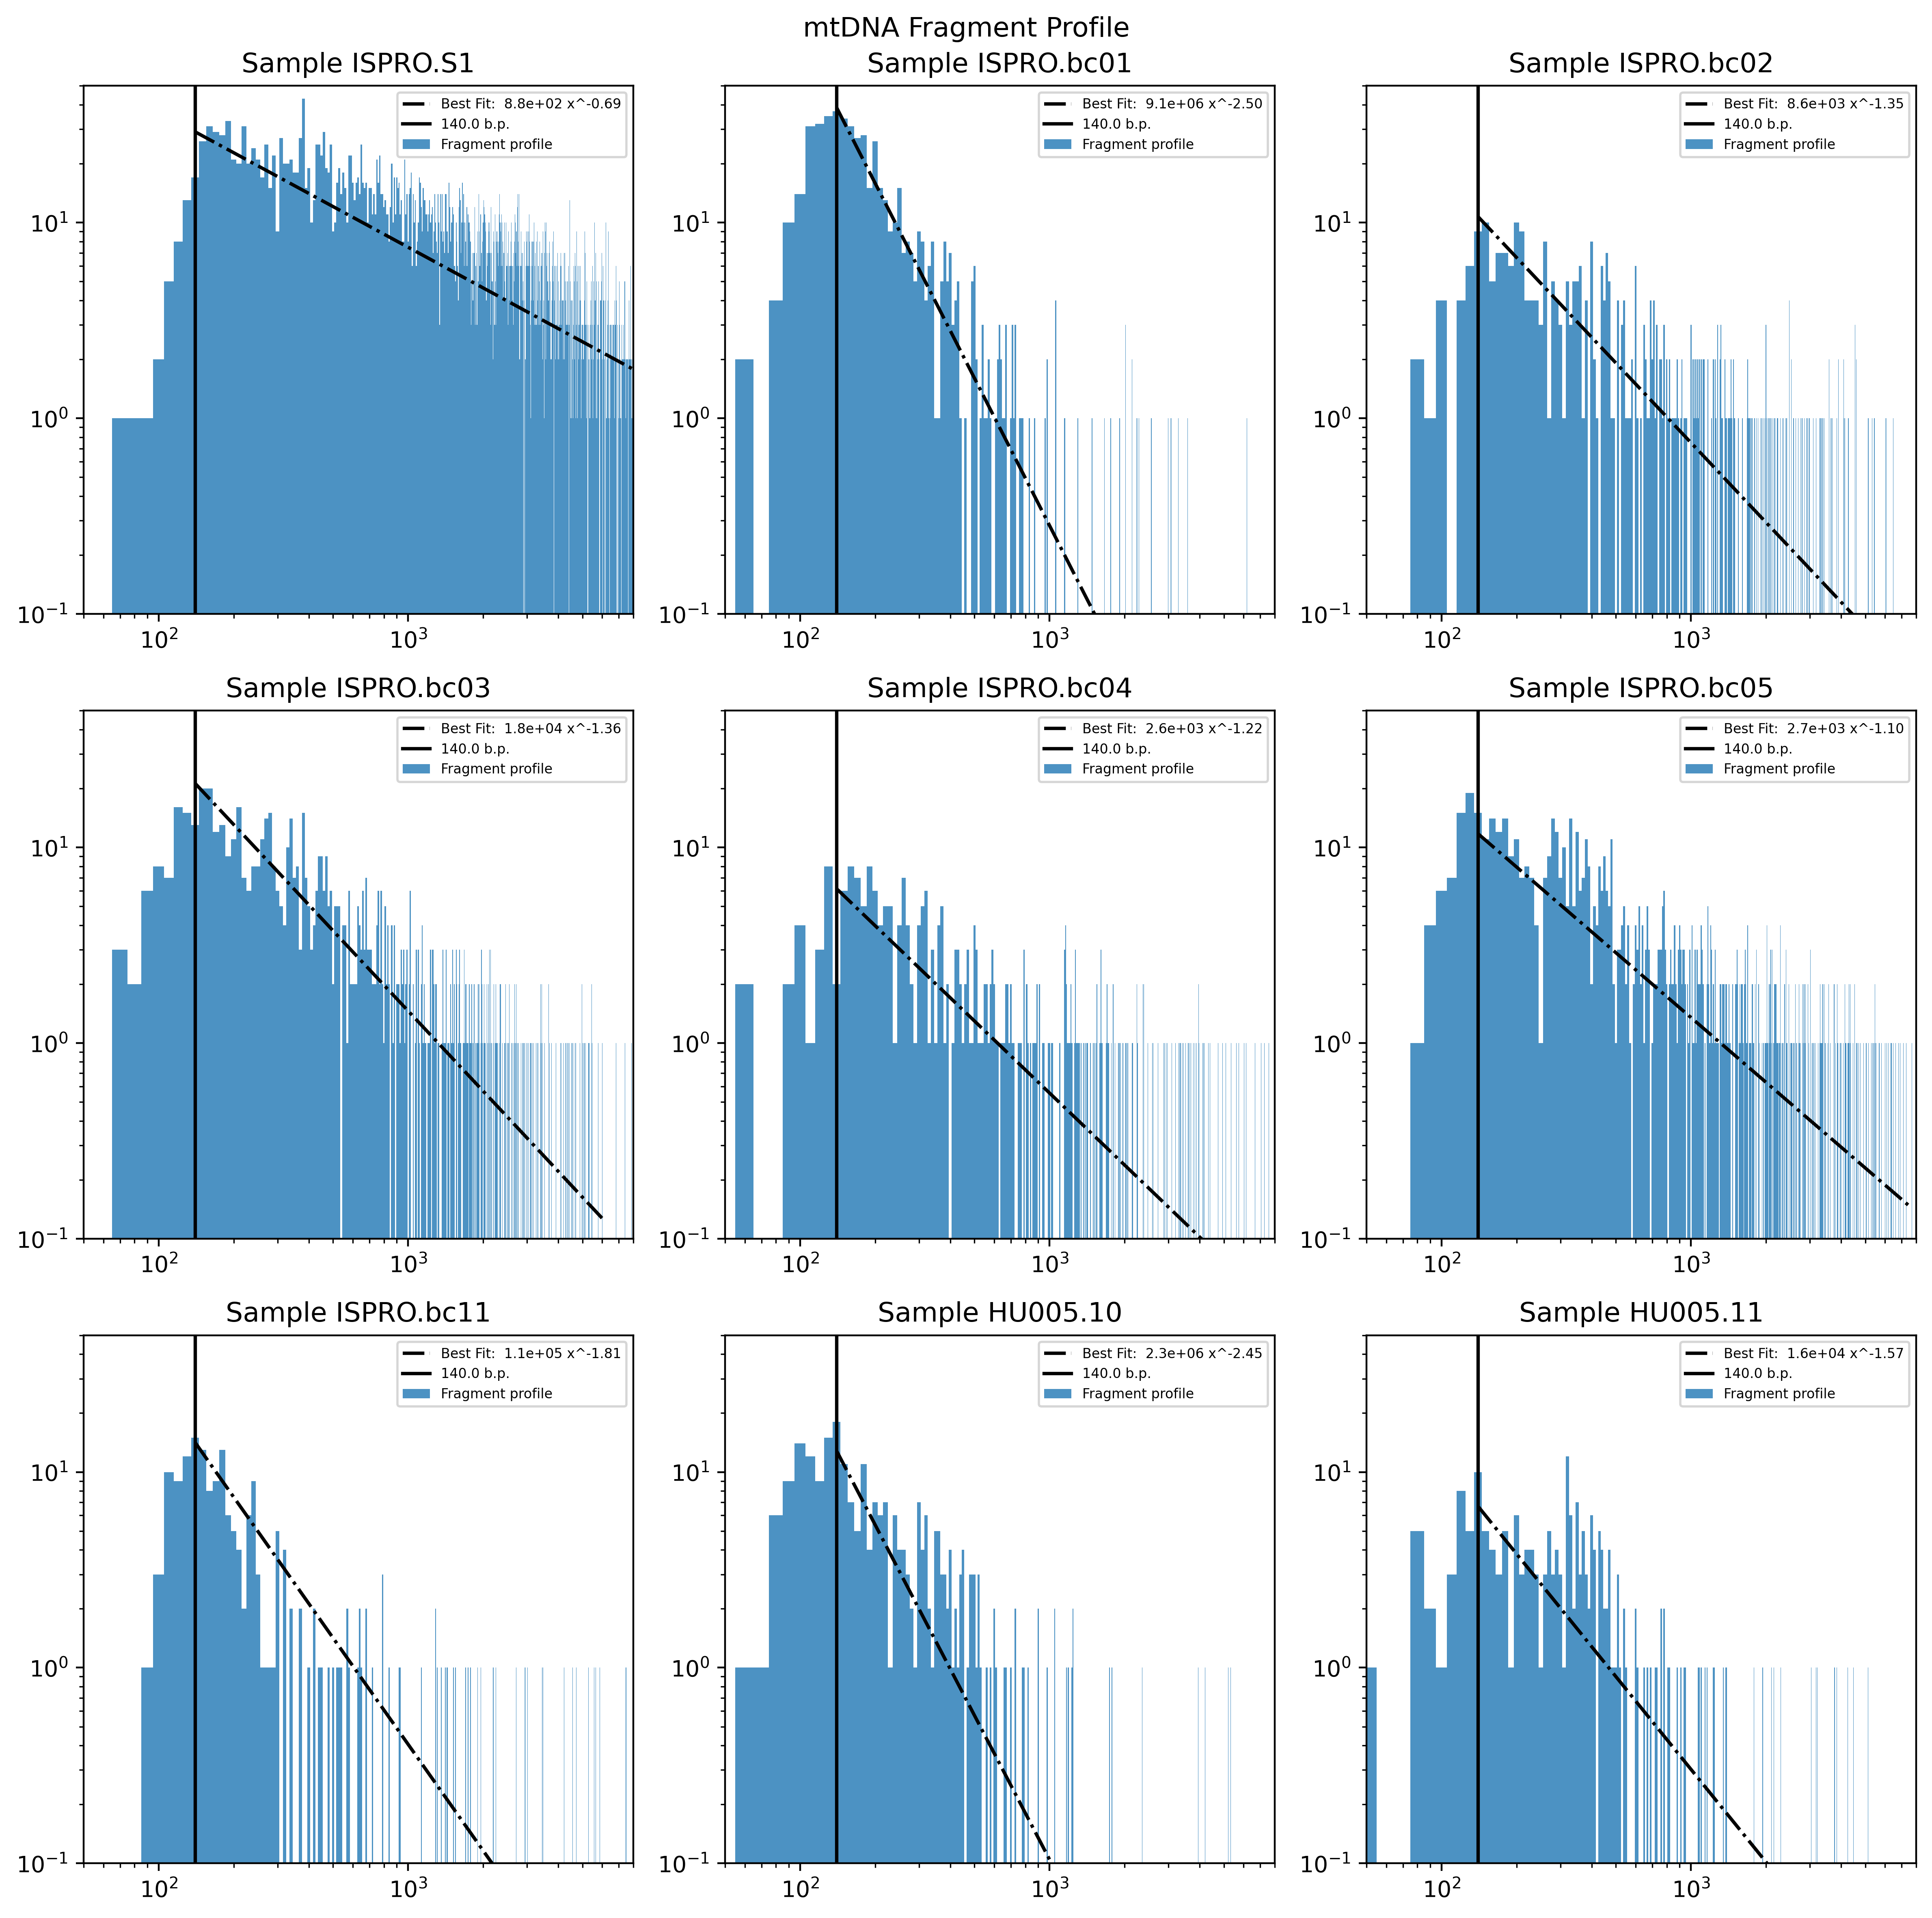

In [9]:
import scipy.interpolate
fig, ax = plt.subplots(3,3,figsize= (12,12), dpi=400)
counter = 0
bf_coeff = np.zeros((n,2))
low_cutoff=np.ones(n)*140
best_fit_stats = []
for id in mtDNA_id:
    clin_data_binned = df_mtDNA[df_mtDNA['id']==id]
    mtDNA_bins = clin_data_binned['length_group'].to_numpy()
    y_count = clin_data_binned['freq'].to_numpy()
    ax[int(counter/3),counter%3].bar(mtDNA_bins, y_count, width=10, alpha=0.8, label='Fragment profile')
##############################Linear interpolation of fragment counts to provide best fit coefficients that account for 0 counts #####################################################    
    clin_data = df_chrM[df_chrM['id']==id] 
    x = clin_data['length_group'].to_numpy()
    x= np.append([0],x)
    y = np.cumsum(clin_data['freq'].to_numpy())
    y = np.append([0],y)
    cum_count = np.stack([x,y], axis=0)
    y_interp = scipy.interpolate.interp1d(cum_count[0,:], cum_count[1,:])
    up_idx = np.where(y > np.percentile(y,95))[0].min()
    frag_cutoff = x[up_idx]
    x_axis = np.linspace(0,frag_cutoff,int(frag_cutoff/10)+1)
    y_int = y_interp(x_axis)
    freq_int = np.diff(y_int)
    x_max = x_axis[np.where(freq_int == np.max(freq_int))[0]]
    print(id, x_max)
    peak = low_cutoff[counter]
    x_tail = np.linspace(peak,frag_cutoff,int(frag_cutoff/10)+1)
    y_tail = y_interp(x_tail)  
    log_den_trans = np.log(np.diff(y_tail))-np.log(np.diff(y_tail))[0]  #shifting the density point at B_ex to origin
    log_x_axis_trans = np.log(x_tail[1:]) - np.log(x_tail[1]) #shifting the point to origin
    lm = LinearRegression(fit_intercept = False) #apply a linear model with no intercept fit
    lm.fit(log_x_axis_trans.reshape(-1, 1), log_den_trans)
    [m] = lm.coef_
    c = np.log(np.diff(y_tail))[0] - m * np.log(x_tail[1])
    bf_coeff[counter,:] = [m,c]
    print(m,c)
    #plt.plot(x,y/y[-1], label=f'CDF for {id}')
    #plt.title(f'Cumulative Fragment Count for Patients mtDNA')
    #plt.xlabel('Fragment Length (b.p.)')
    #plt.ylabel('Fragment Count')
    #print(np.linspace(0,8000,801),y_int)
    #plt.plot(x,y, label=f'Id: {id}')
    #ax[0, counter].plot(x,y, label=f'Cumulative count')
    #ax[0,counter].set_title(f'Cumulative count, Sample {id}')
    ax[int(counter/3),counter%3].set_ylim([0.1,50])
    ax[int(counter/3),counter%3].set_xlim([50,8000])
    ax[int(counter/3),counter%3].set_xscale('log')
    ax[int(counter/3),counter%3].set_yscale('log')
    ax[int(counter/3),counter%3].plot(x_tail, np.exp(c)*x_tail**m, label=f'Best Fit: {np.exp(c): .1e} x^{m: .2f}', color='k', linestyle='-.')
    ax[int(counter/3),counter%3].set_title(f'Sample {id}')
    #ax[counter].set_xlim([100,frag_cutoff])
    ax[int(counter/3),counter%3].axvline(peak, label=f'{peak} b.p.', color='k')
    ax[int(counter/3),counter%3].legend(loc='upper right',fontsize=6)  #ax[1, counter].legend()
    fig.tight_layout()
    best_fit_stats += [[mtDNA_health[counter], id, m,c]]
    counter +=1
    fig.suptitle('mtDNA Fragment Profile')



#fig.savefig('../Clinical Data Analysis/Population Plot/mtDNA_frag_prof_nanopore_1.png')
#fig.savefig('../Clinical Data Analysis/Population Plot/mtDNA_frag_prof_nanopore_1.pdf')
fig.savefig('../Clinical Data Analysis/Population Plot/mtDNA_frag_prof_nanopore_loglog.png')
fig.savefig('../Clinical Data Analysis/Population Plot/mtDNA_frag_prof_nanopore_loglog.pdf')

print(bf_coeff)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


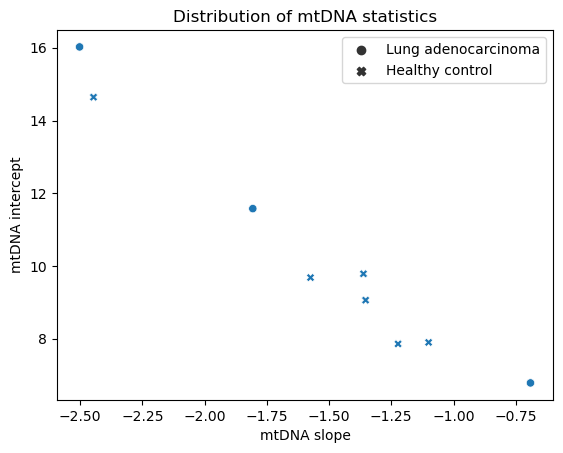

In [10]:
df_bf = pd.DataFrame(best_fit_stats, columns = ['condition','id','mtDNA slope', 'mtDNA intercept'])
g2 = sns.scatterplot(data=df_bf, x='mtDNA slope', y='mtDNA intercept', style= 'condition')
g2.set(title='Distribution of mtDNA statistics')
g2.legend()
plt.savefig('../Clinical Data Analysis/Population Plot/mtDNA_stats_dist.eps')
plt.savefig('../Clinical Data Analysis/Population Plot/mtDNA_stats_dist.png')


## gDNA Fragment Profile Curve-fitting analysis

### Per Patient Visualisation

Lung adenocarcinoma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Lung adenocarcinoma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Healthy control


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Healthy control


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Healthy control


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Healthy control


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Lung adenocarcinoma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Lung adenocarcinoma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Lung adenocarcinoma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Lung adenocarcinoma


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Healthy control


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Healthy control


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Healthy control


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


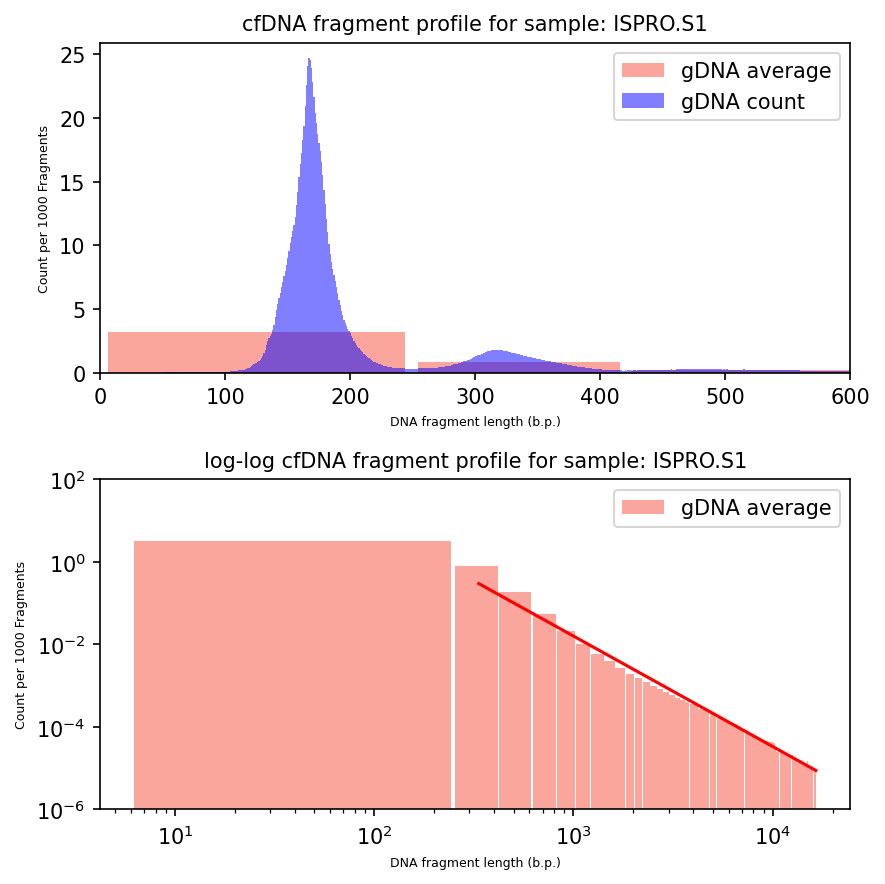

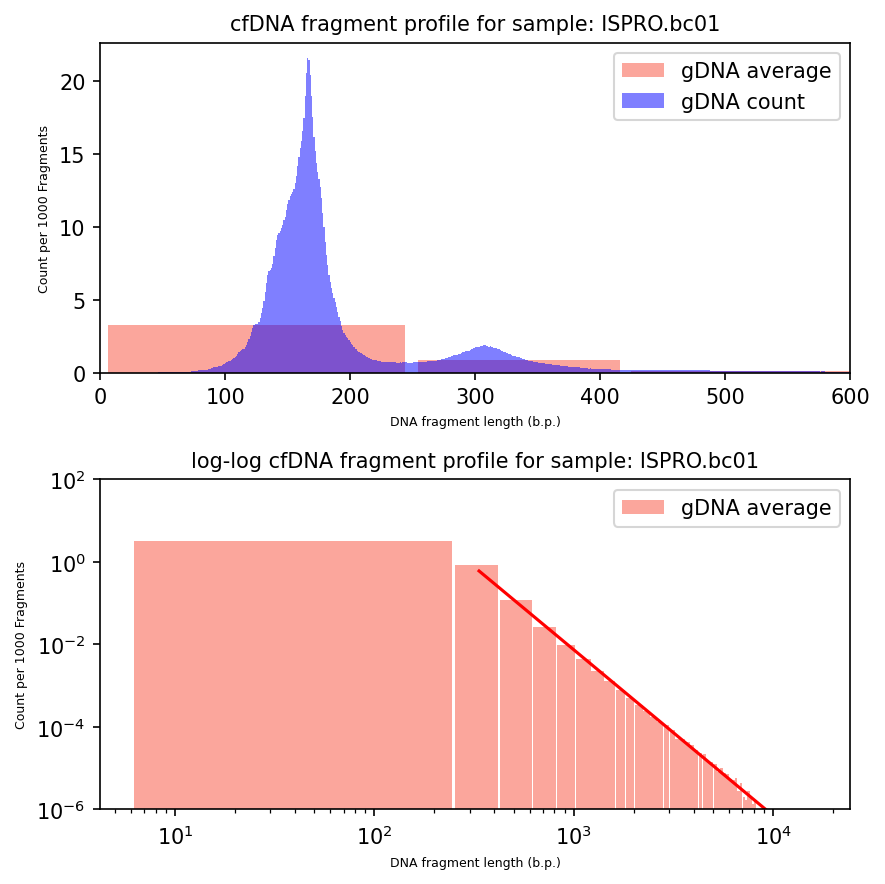

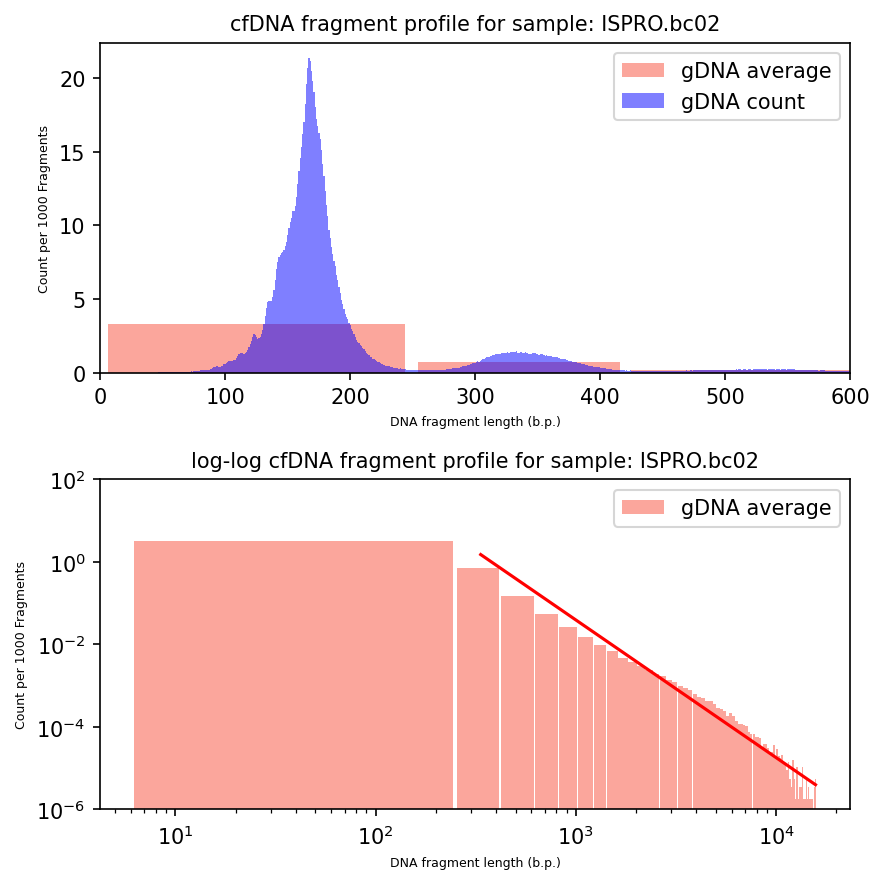

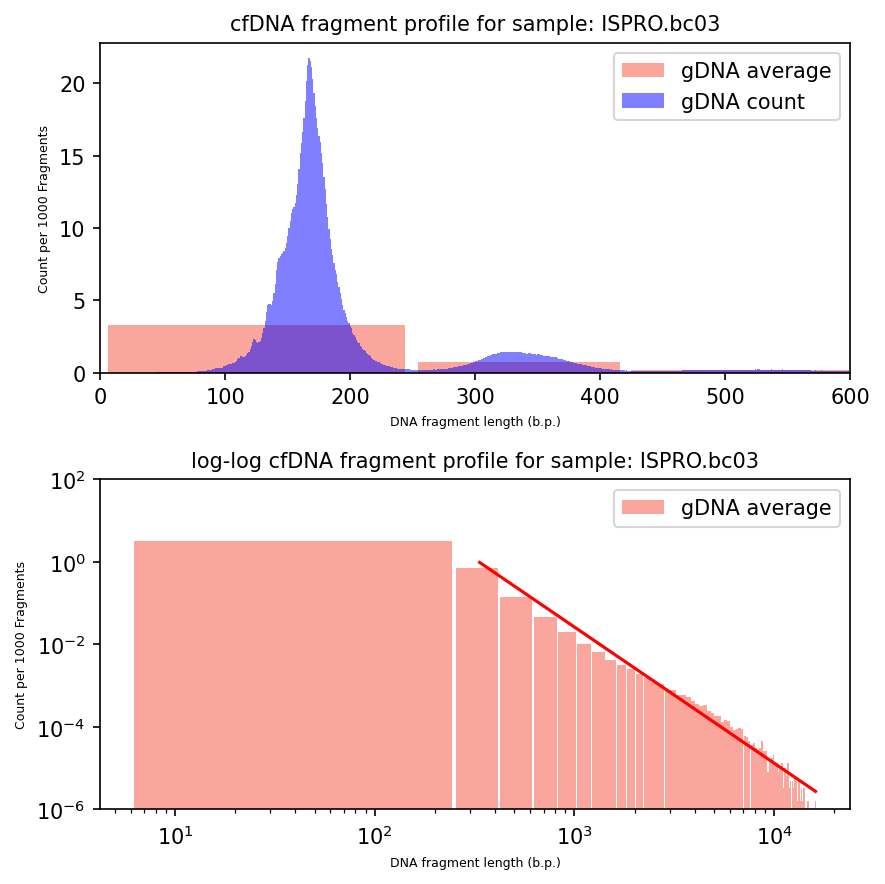

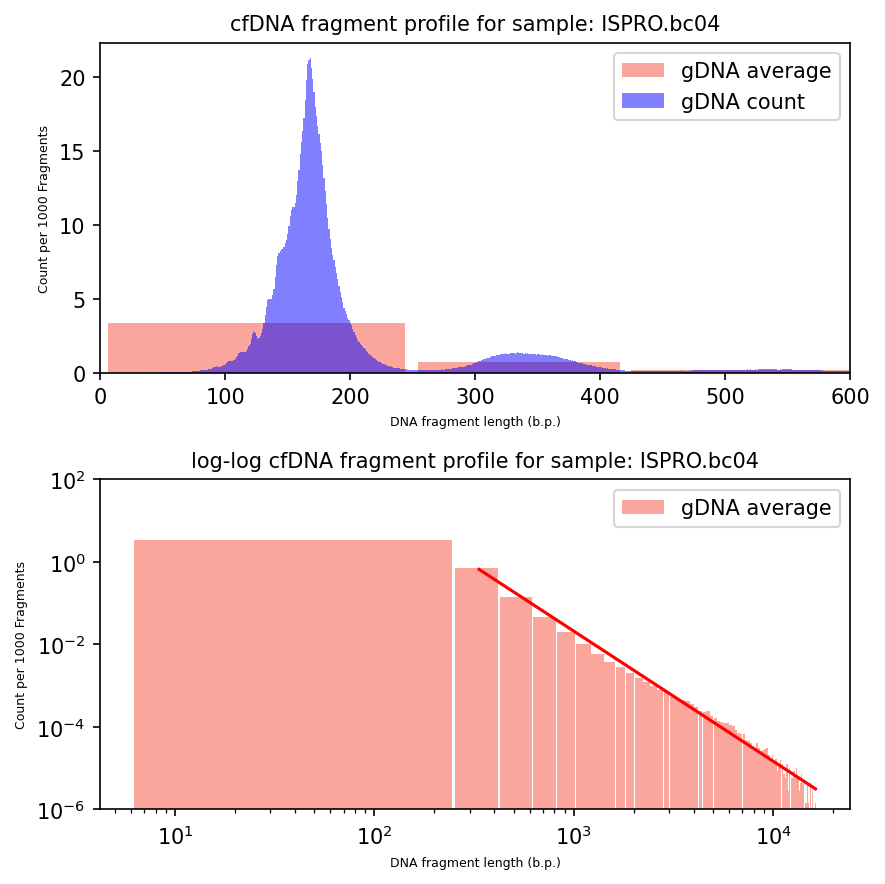

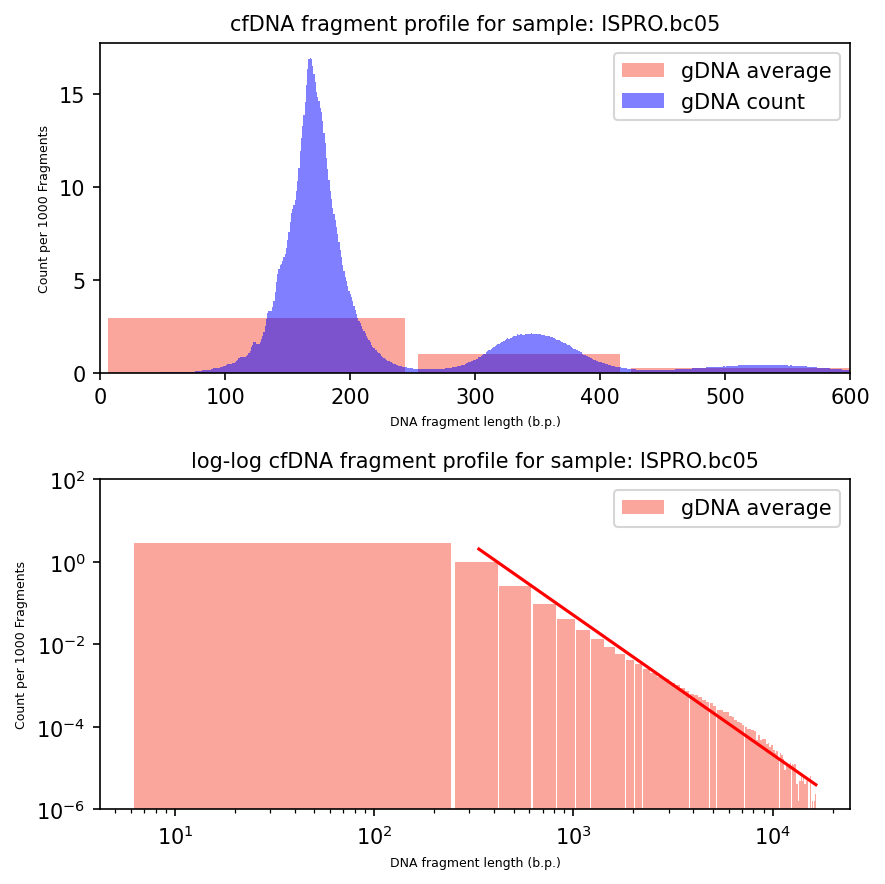

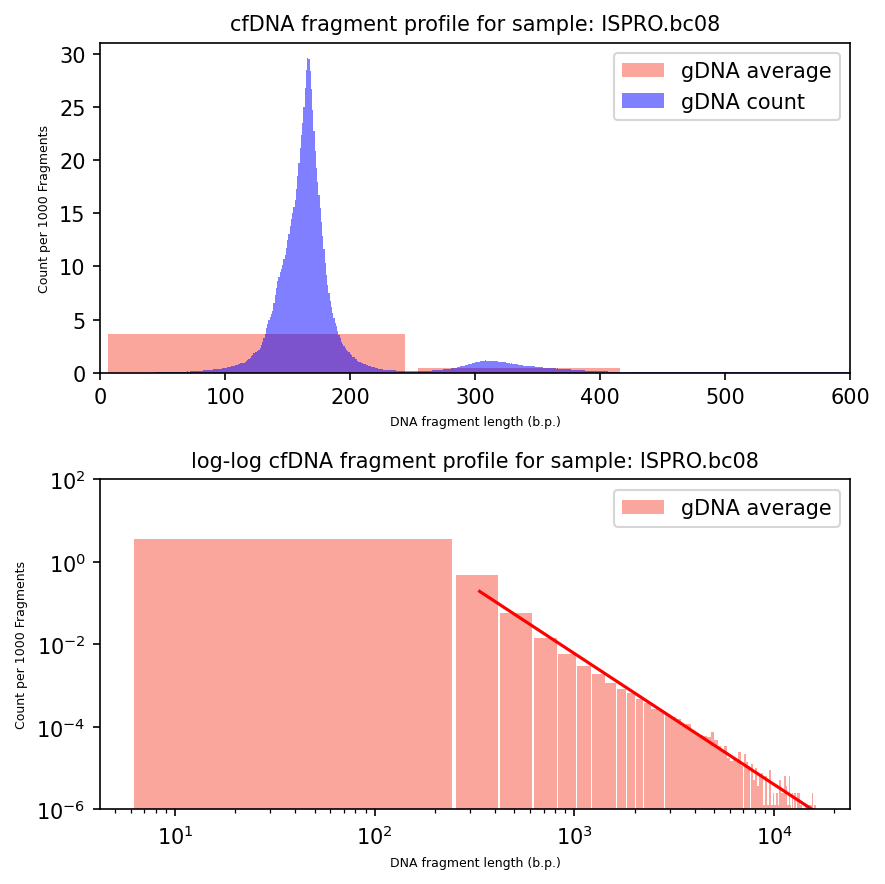

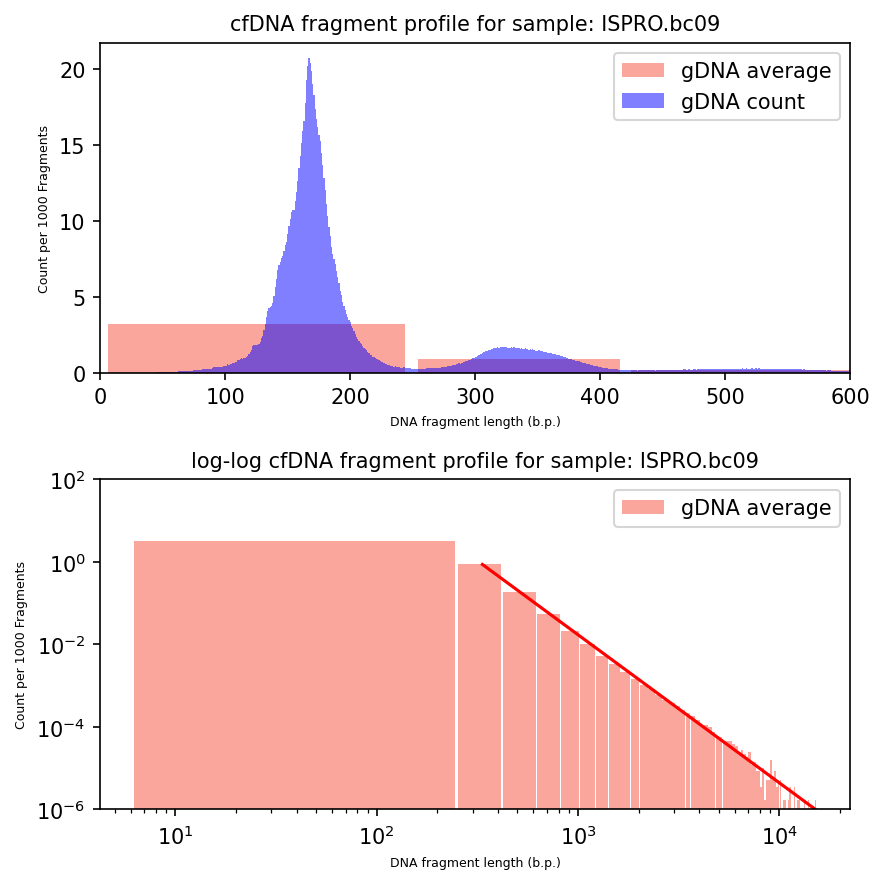

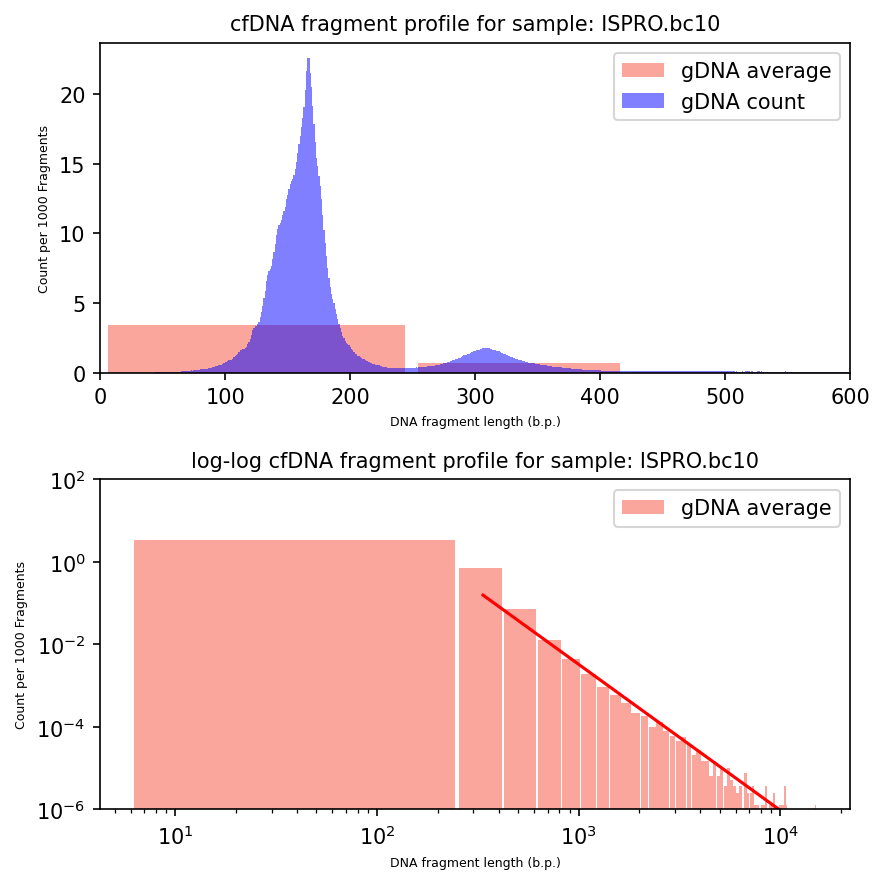

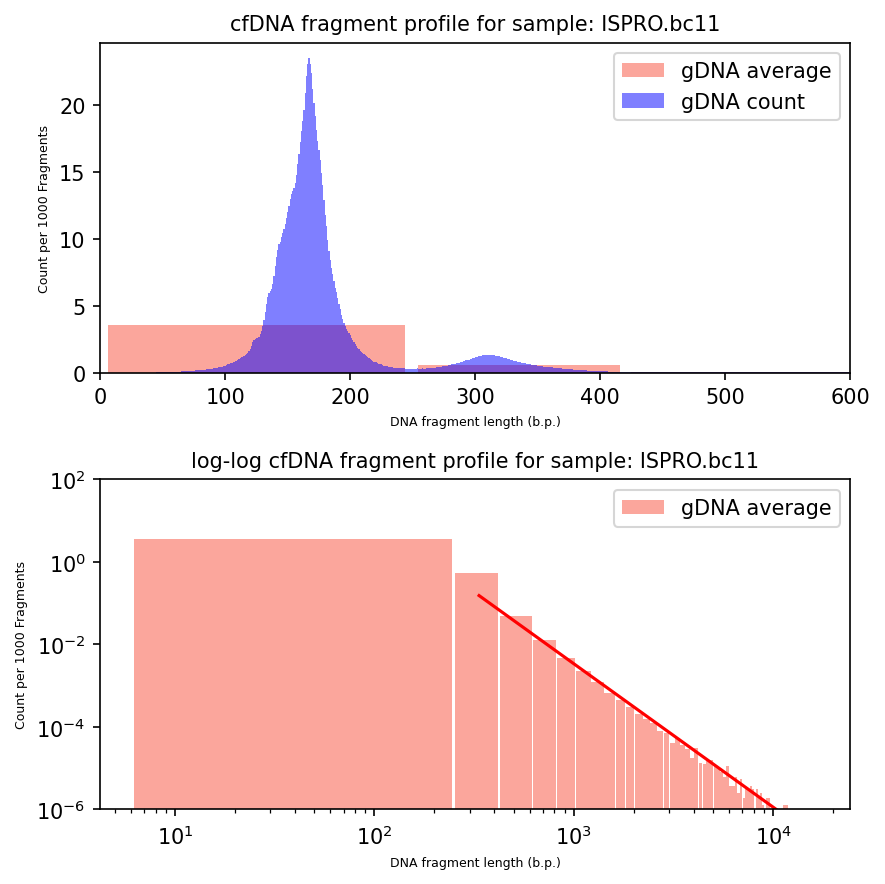

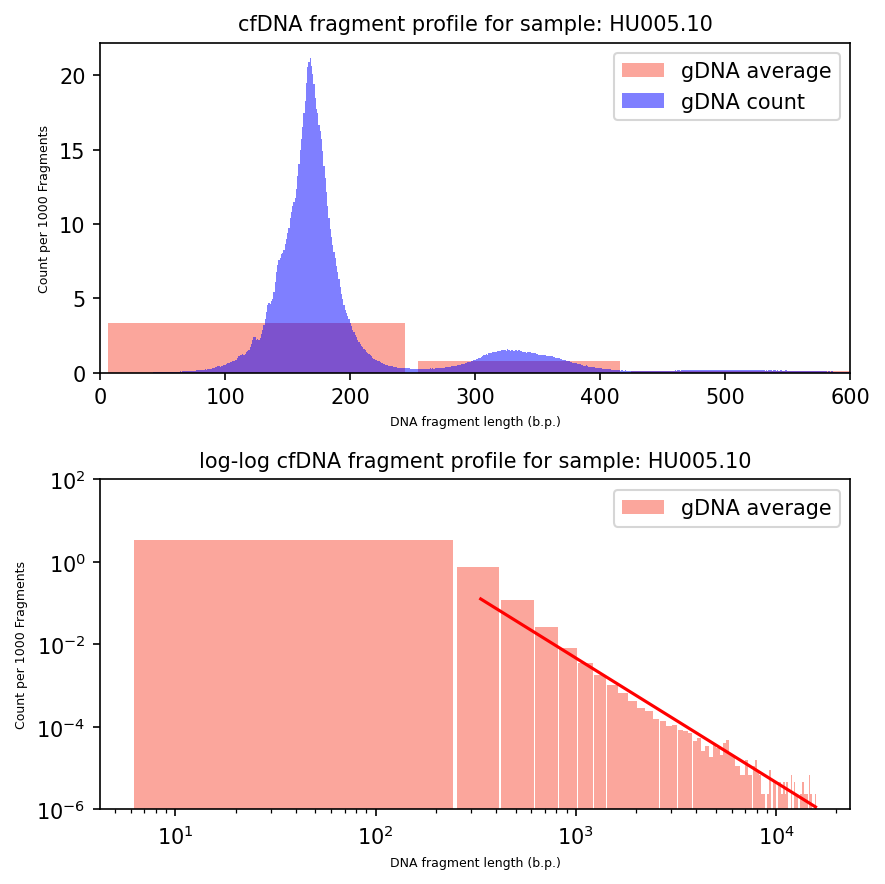

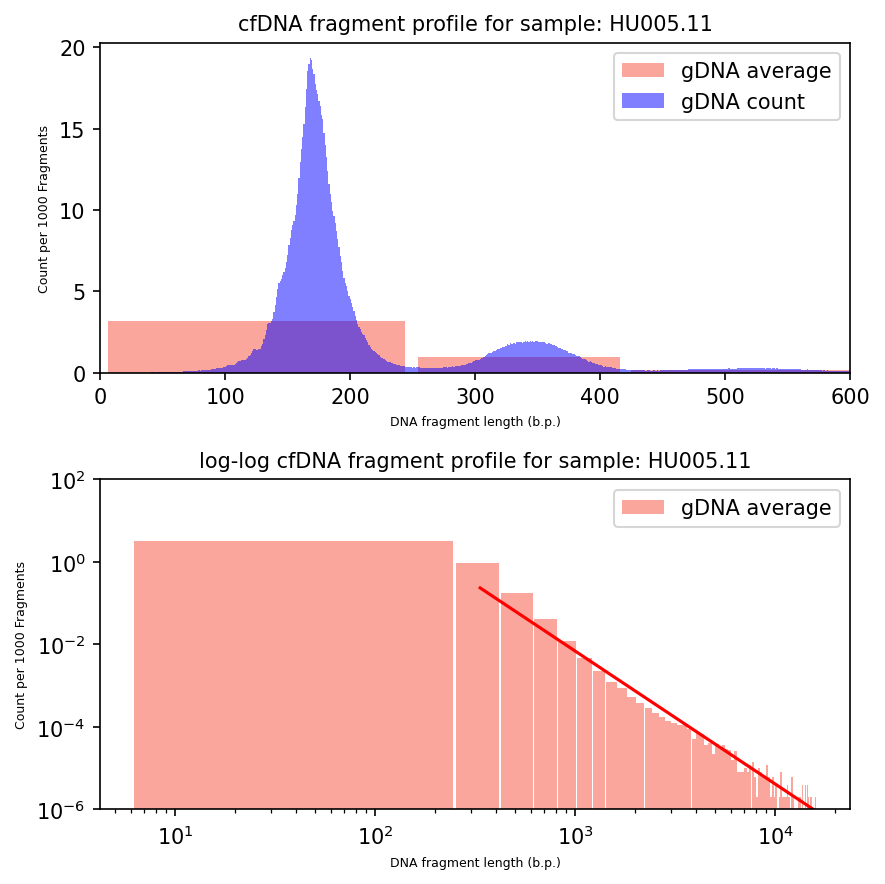

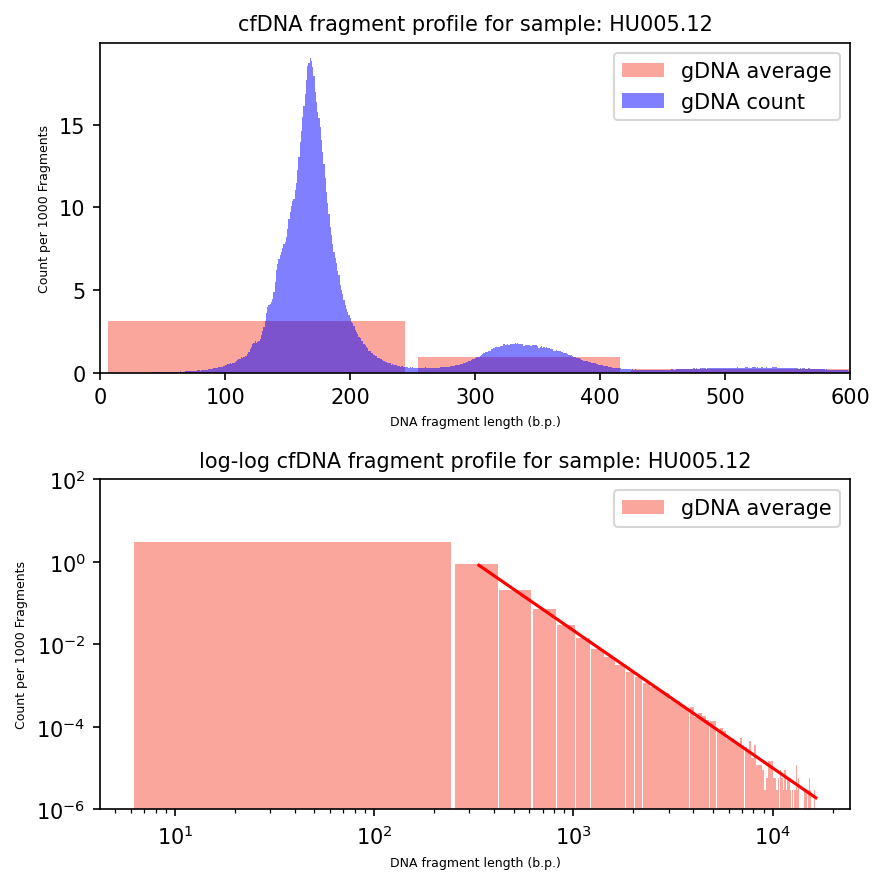

In [11]:
best_fit_stats = []


for id in id_list:
    fig, ax = plt.subplots(2, dpi=150, figsize=[6,6])
    df_id_gDNA = df_gDNA[df_gDNA['id']==id]
    [id_health]=df_id_gDNA.condition.unique()
    print(id_health)
    avg_count = df_id_gDNA['freq'].to_numpy()/(df_id_gDNA['freq'].sum()*df_id_gDNA['length_width'])*1000
    avg_bin = df_id_gDNA['length_group'].to_numpy()
    m_0,c_0 = np.polyfit(np.log(avg_bin[1:]),np.log(avg_count[1:]),1)
    #gDNA_tail = df_id_gDNA[df_id_gDNA['length_group']>=167]
    #gDNA_tail_length = gDNA_tail['length_group'].to_numpy()
    #gDNA_tail_count = gDNA_tail['freq'].to_numpy()/(gDNA_tail['freq'].sum()*gDNA_tail['length_width'])*1000
    #m_0, c_0 = np.polyfit(np.log(gDNA_tail_length),np.log(gDNA_tail['freq'].to_numpy()),1)
    
    clin_data_full = df_gDNA_full[df_gDNA_full['id']==id]
    clin_data_full = clin_data_full[clin_data_full['length']<=10000]
    clin_data_full.sort_values(by='length')
    clin_length_full = clin_data_full['length'].to_numpy()
    clin_freq_full = clin_data_full['freq'].to_numpy()    
    
    ax[0].set_title('cfDNA fragment profile for sample: ' + id, fontsize=10)
    #print(df_id_gDNA['length_group'].to_numpy())
    ax[0].bar(x=avg_bin, height=avg_count,label='gDNA average', alpha=0.7, color='salmon', width = df_id_gDNA['length_width'].to_numpy()*0.95)
    #ax[0].scatter(gDNA_tail_length, np.exp(c_0)*gDNA_tail_length**m_0,label=f'Best Fit: {np.exp(c_0): .1e}x^{m_0: .2f}', color = 'k', s=0.5)
    ax[0].set_xlabel('DNA fragment length (b.p.)', fontsize=6)
    ax[0].set_xlim([0,600])
    ax[0].bar(clin_length_full,clin_freq_full/np.sum(clin_freq_full)*1000, label=f"gDNA count", width=1, alpha=0.5, color = 'b')
    #ax[0].set_yscale('log')
    #ax[0].bar(x=df_id_chrM['length_group'].to_numpy(), height=df_id_chrM['freq'].to_numpy(),label='mtDNA',width=0.8*len_grp_size, alpha=1, color='blue')
    #ax[0].plot(chrM_tail_length, np.exp(c_1)*chrM_tail_length**m_1,label=f'mtDNA count best fit curve: {np.exp(c_1): .1e}x^{m_1: .2f}', color = 'darkblue')
    ax[0].set_ylabel('Count per 1000 Fragments', fontsize=6)
    ax[0].legend(loc='upper right')

    ax[1].set_title('log-log cfDNA fragment profile for sample: ' + id, fontsize=10)
    ax[1].bar(x=avg_bin, height=avg_count,label='gDNA average', alpha=0.7, color='salmon', width=df_id_gDNA['length_width'].to_numpy()*0.95)
    ax[1].plot(avg_bin[1:], np.exp(c_0)*avg_bin[1:]**m_0, color = 'red')
    ax[1].set_xlabel('DNA fragment length (b.p.)', fontsize=6)
    #ax[1].bar(x=df_id_chrM['length_group'].to_numpy(), height=df_id_chrM['freq'].to_numpy(),label='mtDNA',width=0.8*len_grp_size, alpha=1, color='blue')
    #ax[1].plot(chrM_tail_length, np.exp(c_1)*chrM_tail_length**m_1,label=f'log y = {c_1: .1e}+ {m_1: .2f} log x', color = 'darkblue')
    ax[1].set_ylabel('Count per 1000 Fragments', fontsize=6)
    ax[1].legend(loc='upper right')
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_ylim([10**-6,10**2])
    best_fit_stats += [[id_health, id, m_0,c_0]]
    #ax1[id_list.index(id)].legend()
    #fig1.suptitle('Mitochondrial cfDNA fragment profile for healthy patients', fontsize =30)
    fig.tight_layout()
    path = r'../Clinical Data Analysis/Individual Plots'
    fig_name = str(id) +'_ind_plt'
    fig.savefig(path + '/'+ fig_name +'.eps', transparent=False)
    fig.savefig(path + '/'+ fig_name +'.png', transparent=False)  
    fig.savefig(path + '/'+ fig_name +'.pdf', transparent=True)  





### All Samples in One Picture

Lung adenocarcinoma
Lung adenocarcinoma
Healthy control
Healthy control
Healthy control
Healthy control
Lung adenocarcinoma
Lung adenocarcinoma
Lung adenocarcinoma
Lung adenocarcinoma
Healthy control
Healthy control
Healthy control


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


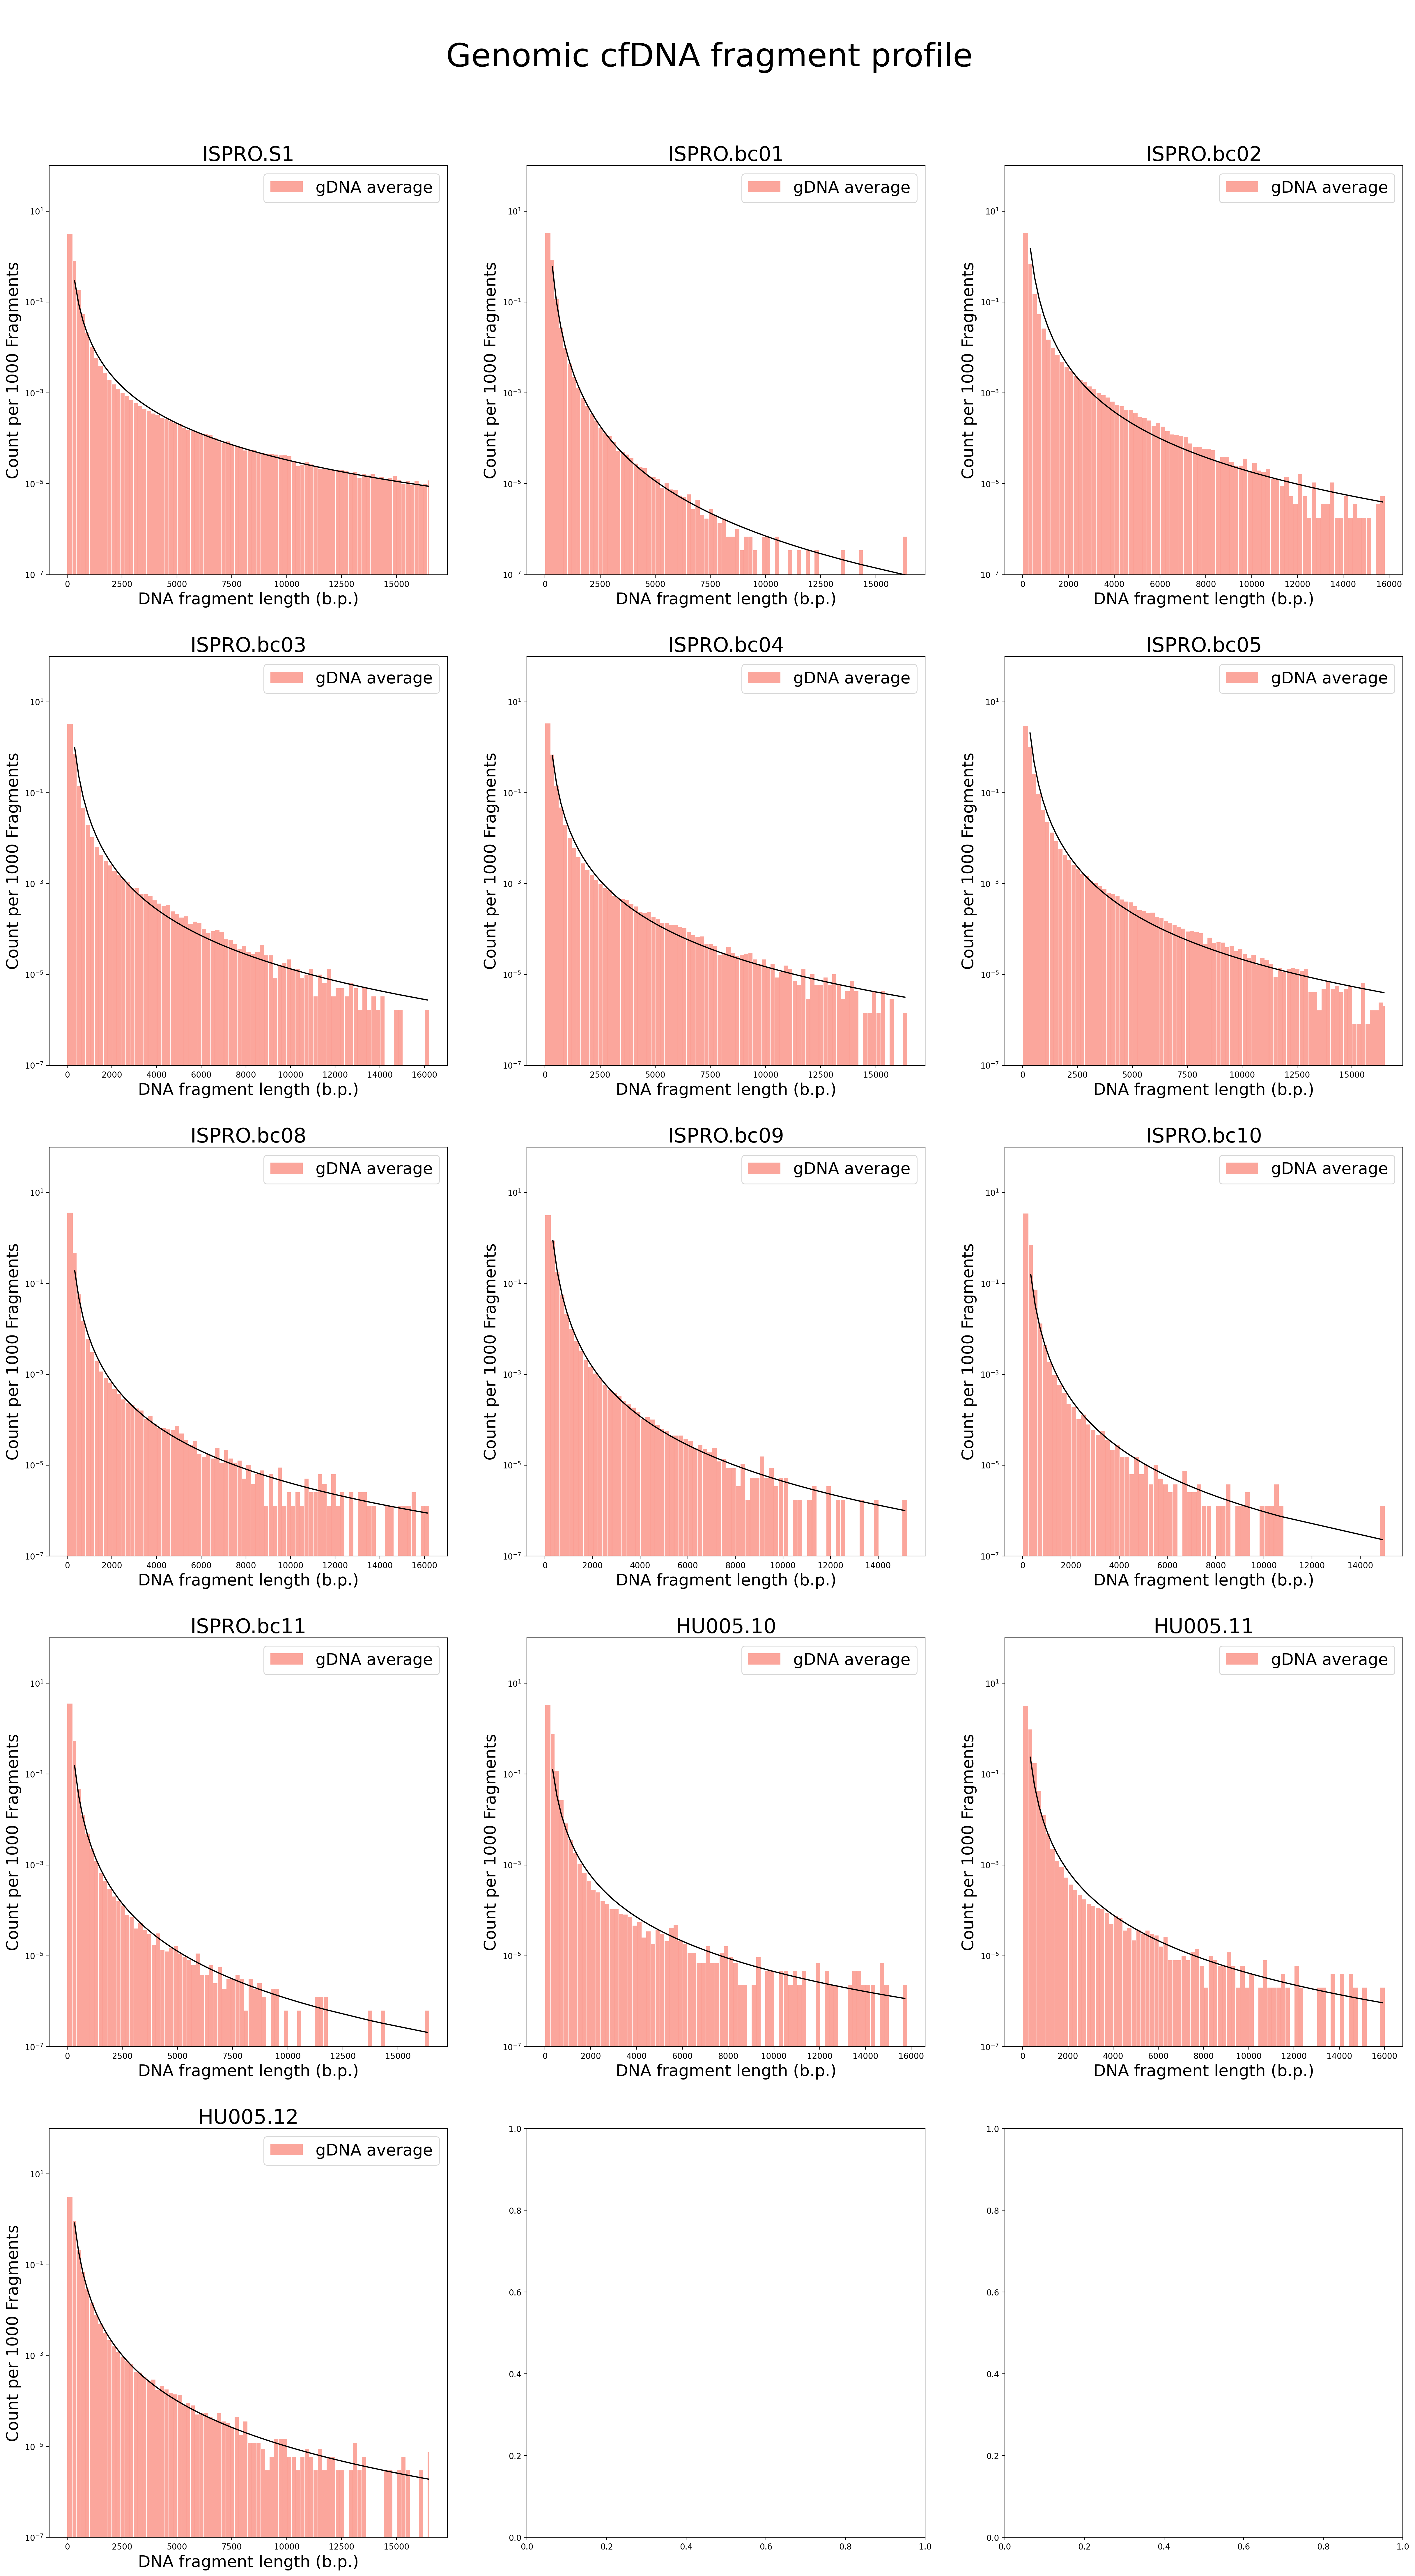

In [12]:
fig, ax = plt.subplots(5,3, dpi=200, figsize=[30,50])
counter=0
fig.suptitle('\n Genomic cfDNA fragment profile', fontsize =40)

for id in id_list:
    df_id_gDNA = df_gDNA[df_gDNA['id']==id]
    [id_health]=df_id_gDNA.condition.unique()
    print(id_health)
    avg_count = df_id_gDNA['freq'].to_numpy()/(df_id_gDNA['freq'].sum()*df_id_gDNA['length_width'])*1000
    avg_bin = df_id_gDNA['length_group'].to_numpy()
    m_0,c_0 = np.polyfit(np.log(avg_bin[1:]),np.log(avg_count[1:]),1)
    #gDNA_tail = df_id_gDNA[df_id_gDNA['length_group']>=167]
    #gDNA_tail_length = gDNA_tail['length_group'].to_numpy()
    #gDNA_tail_count = gDNA_tail['freq'].to_numpy()/(gDNA_tail['freq'].sum()*gDNA_tail['length_width'])*1000
    #m_0, c_0 = np.polyfit(np.log(gDNA_tail_length),np.log(gDNA_tail['freq'].to_numpy()),1)
    
    clin_data_full = df_gDNA_full[df_gDNA_full['id']==id]
    clin_data_full = clin_data_full[clin_data_full['length']<=10000]
    clin_data_full.sort_values(by='length')
    clin_length_full = clin_data_full['length'].to_numpy()
    clin_freq_full = clin_data_full['freq'].to_numpy()    
    
    ax[int(counter/3),counter%3].set_title(id, fontsize=25)
    ax[int(counter/3),counter%3].bar(x=avg_bin, height=avg_count,label='gDNA average', alpha=0.7, color='salmon', width=df_id_gDNA['length_width'].to_numpy()*0.95)
    ax[int(counter/3),counter%3].plot(avg_bin[1:], np.exp(c_0)*avg_bin[1:]**m_0, color = 'k')
    ax[int(counter/3),counter%3].set_xlabel('DNA fragment length (b.p.)', fontsize=20)
    #ax[1].bar(x=df_id_chrM['length_group'].to_numpy(), height=df_id_chrM['freq'].to_numpy(),label='mtDNA',width=0.8*len_grp_size, alpha=1, color='blue')
    #ax[1].plot(chrM_tail_length, np.exp(c_1)*chrM_tail_length**m_1,label=f'log y = {c_1: .1e}+ {m_1: .2f} log x', color = 'darkblue')
    ax[int(counter/3),counter%3].set_ylabel('Count per 1000 Fragments', fontsize=20)
    ax[int(counter/3),counter%3].legend(loc='upper right', fontsize=20)
    ax[int(counter/3),counter%3].set_yscale('log')
    ax[int(counter/3),counter%3].set_ylim([10**-7,10**2])
    counter+=1
    #ax1[id_list.index(id)].legend()
    #fig1.suptitle('Mitochondrial cfDNA fragment profile for healthy patients', fontsize =30)

#fig.tight_layout()
fig.subplots_adjust(top=0.925)
path = r'../Clinical Data Analysis/Population Plot'
fig.savefig(path + '/gDNA_frag_prof_nanopore.png', transparent=False)
fig.savefig(path + '/gDNA_frag_prof_nanopore.eps', transparent=False) 
fig.savefig(path + '/gDNA_frag_prof_nanopore.pdf', transparent=False)



### Scatter Plots of Fragment Profile Statistics

In [13]:
df_bf = pd.DataFrame(best_fit_stats, columns = ['condition','id','gDNA slope', 'gDNA intercept'])
df_bf.to_csv('../Clinical Data Analysis/Parameters CSV/gDNA_best_fit_coeff.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


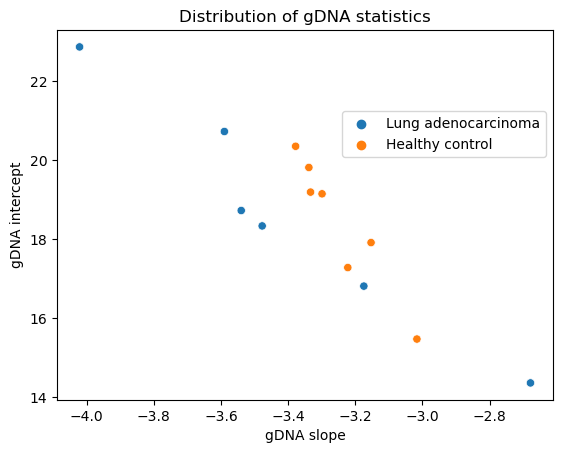

In [14]:
g1 = sns.scatterplot(data=df_bf, x='gDNA slope', y='gDNA intercept', hue='condition')
g1.set(title='Distribution of gDNA statistics')
g1.legend(bbox_to_anchor=(1, 0.8))
plt.savefig(path + '/gDNA_stats_dist_nanopore.png')
plt.savefig(path + '/gDNA_stats_dist_nanopore.eps')
plt.savefig(path + '/gDNA_stats_dist_nanopore.pdf')



## mtDNA FRIME Best Fit Simulation

We now try to use our FRIME process simulation to simulate the fragment profiles.

We only work on 4 fragment profiles with more than 500 fragment counts for accurate statistical inference.





In [15]:
## Printing lists of id with 500+ mtDNA fragments

mtDNA_id_500 = []
for id in id_list:
    #id = 'ISPRO.bc05'
    clin_data = df_chrM[df_chrM['id']==id] #chrM
    health = clin_data['condition'].iloc[0]
    x = clin_data['length_group'].to_numpy()
    x= np.append([0],x)
    y = np.cumsum(clin_data['freq'].to_numpy())
    if y[-1] >= 500:
        #print(id, y[-1], clin_data['condition'])
        mtDNA_id_500 += [id]
print(f'ID list: {mtDNA_id_500}')


ID list: ['ISPRO.S1', 'ISPRO.bc01', 'ISPRO.bc03', 'ISPRO.bc05']


In [16]:
#Only use the following two lines to re-create a new sim_clin_df file
#sim_clin_df = pd.DataFrame(columns = ['time','id','clin_list','sim_list','seed','N_event','KS_dist','p-value','ex_max','ex_slope','frag_speed','N_split','a','b','alpha_f','Nimm','imm_rate','lin_ex','B_ex','alpha_e','x_max'])
#sim_clin_df.to_csv('../Clinical Data Analysis/Parameters CSV/sim_clin.csv', index=False)


sim_clin_df = pd.read_csv('../Clinical Data Analysis/Parameters CSV/sim_clin.csv')
display(sim_clin_df)


time          id                                          clin_list  \
0   1684277146  ISPRO.bc05  [73, 84, 84, 86, 90, 93, 96, 96, 99, 100, 100,...   
1   1684277275    ISPRO.S1  [70, 78, 90, 93, 96, 101, 101, 105, 106, 108, ...   
2   1684277480  ISPRO.bc03  [64, 65, 65, 76, 80, 81, 85, 86, 88, 88, 90, 9...   
3   1684277625  ISPRO.bc01  [59, 60, 74, 74, 75, 79, 81, 81, 83, 86, 86, 8...   
4   1684791834  ISPRO.bc05  [73, 84, 84, 86, 90, 93, 96, 96, 99, 100, 100,...   
5   1684837622  ISPRO.bc05  [73, 84, 84, 86, 90, 93, 96, 96, 99, 100, 100,...   
6   1684949683  ISPRO.bc05  [73, 84, 84, 86, 90, 93, 96, 96, 99, 100, 100,...   
7   1684949820    ISPRO.S1  [70, 78, 90, 93, 96, 101, 101, 105, 106, 108, ...   
8   1684950027  ISPRO.bc03  [64, 65, 65, 76, 80, 81, 85, 86, 88, 88, 90, 9...   
9   1686141480  ISPRO.bc05  [73, 84, 84, 86, 90, 93, 96, 96, 99, 100, 100,...   
10  1686141617    ISPRO.S1  [70, 78, 90, 93, 96, 101, 101, 105, 106, 108, ...   
11  1686141824  ISPRO.bc03  [64, 65, 65, 76, 80, 81, 85, 86, 88, 88, 90, 9...   
12  1686141967  ISPRO.bc01  [59, 60, 74, 74, 75, 79, 81, 81, 83, 86, 86, 8...   

                                             sim_list  seed  N_event  \
0   [5728. 4805. 6154. 4564. 8334. 9835. 7436. 492...    42  1000000   
1           [9422. 6090. 9804. ...   10. 4275. 3376.]    42  1000000   
2           [4025. 6526. 9652. ...  256.   19.  381.]    42  1000000   
3                 [163. 149. 181. ... 159.  94.  98.]    42  1000000   
4   [5728. 4805. 6154. 4564. 8334. 9835. 7436. 492...    42  1000000   
5   [5728. 4805. 6154. 4564. 8334. 9835. 7436. 492...    42  1000000   
6   [5728. 4805. 6154. 4564. 8334. 9835. 7436. 492...    42  1000000   
7           [9422. 6090. 9804. ...   10. 4275. 3376.]    42  1000000   
8           [4025. 6526. 9652. ...  256.   19.  381.]    42  1000000   
9   [5728. 4805. 6154. 4564. 8334. 9835. 7436. 492...    42  1000000   
10          [9422. 6090. 9804. ...   10. 4275. 3376.]    42  1000000   
11          [4025. 6526. 9652. ...  256.   19.  381.]    42  1000000   
12                [163. 149. 181. ... 159.  94.  98.]    42  1000000   

     KS_dist   p-value  ex_max  ex_slope  ...  N_split  a  b  alpha_f  Nimm  \
0   0.047938  0.216399     140     16500  ...        2  1  1    -0.78     1   
1   0.021800  0.287274     375     16500  ...        2  1  1    -1.00     1   
2   0.045822  0.260722     135     16500  ...        2  1  1    -0.50     1   
3   0.049297  0.345488     110     16500  ...        2  1  1     0.36     1   
4   0.047938  0.216399     140     16500  ...        2  1  1    -0.78     1   
5   0.047938  0.216399     140     16500  ...        2  1  1    -0.78     1   
6   0.047938  0.216399     140     16500  ...        2  1  1    -0.78     1   
7   0.021800  0.287274     375     16500  ...        2  1  1    -1.00     1   
8   0.045822  0.260722     135     16500  ...        2  1  1    -0.50     1   
9   0.047938  0.216399     140     16500  ...        2  1  1    -0.78     1   
10  0.021800  0.287274     375     16500  ...        2  1  1    -1.00     1   
11  0.045822  0.260722     135     16500  ...        2  1  1    -0.50     1   
12  0.049297  0.345488     110     16500  ...        2  1  1     0.36     1   

    imm_rate  lin_ex   B_ex  alpha_e  x_max  
0          8   False    inf    -2.10  10000  
1         11   False    inf    -2.05  10000  
2         10   False    inf    -2.10  10000  
3         10   False  115.0    -2.50  10000  
4          8   False    inf    -2.10  10000  
5          8   False    inf    -2.10  10000  
6          8   False    inf    -2.10  10000  
7         11   False    inf    -2.05  10000  
8         10   False    inf    -2.10  10000  
9          8   False    inf    -2.10  10000  
10        11   False    inf    -2.05  10000  
11        10   False    inf    -2.10  10000  
12        10   False  115.0    -2.50  10000  

[13 rows x 21 columns]

### Best Fit for Sample 'ISPRO.bc05'

In [17]:
from Frag_Ex_Imm_Func import *
from itertools import groupby
id = 'ISPRO.bc05'
clin_data = df_chrM[df_chrM['id']==id] #chrM
clin_data = clin_data[clin_data['length_group']<=10000]
#clin_data = df_gDNA[df_gDNA['id']==id] #gDNA
display(clin_data)
clin_data = clin_data.sort_values('length_group') #For chrM Data
#clin_data = clin_data.sort_values('length') #For gDNA Data
clin_data['cumsum']=clin_data['freq'].cumsum()
clin_cum = clin_data[['length_group','cumsum']].to_numpy() #chrM
#clin_cum = clin_data[['length','cumsum']].to_numpy() #gDNA
clin_cum = np.append([[0,0]],clin_cum, axis=0)


############## Writing the cumulative count function from frequency table ##############################
#x_max = clin_data['length'].max() #gDNA
x_max = clin_data['length_group'].max() #mtDNA
clin_ccf = np.zeros(x_max+1)
for i in range(np.shape(clin_cum)[0]):
    clin_ccf[clin_cum[i,0]]=clin_cum[i,1]

for j in range(x_max+1):
    clin_ccf[j]=clin_ccf[0:j+1].max()

################ Generating list of fragment lengths (with repetition) from frequency table #########################
clin_list = []
#chrM
for length in clin_data['length_group']:
    clin_data_length = clin_data[clin_data['length_group']==length]
    clin_list += [length]*clin_data_length['freq'].to_numpy()[0]
#gDNA
#for length in clin_data['length']:
    #clin_data_length = clin_data[clin_data['length']==length]
    #clin_list += [length]*clin_data_length['freq'].to_numpy()[0]

id   chr  length_group     study        condition detail  \
6060  ISPRO.bc05  chrM            73  nanopore  Healthy control    ONT   
6061  ISPRO.bc05  chrM            84  nanopore  Healthy control    ONT   
6062  ISPRO.bc05  chrM            86  nanopore  Healthy control    ONT   
6063  ISPRO.bc05  chrM            90  nanopore  Healthy control    ONT   
6064  ISPRO.bc05  chrM            93  nanopore  Healthy control    ONT   
...          ...   ...           ...       ...              ...    ...   
6788  ISPRO.bc05  chrM          9247  nanopore  Healthy control    ONT   
6789  ISPRO.bc05  chrM          9440  nanopore  Healthy control    ONT   
6790  ISPRO.bc05  chrM          9468  nanopore  Healthy control    ONT   
6791  ISPRO.bc05  chrM          9691  nanopore  Healthy control    ONT   
6792  ISPRO.bc05  chrM          9905  nanopore  Healthy control    ONT   

     specimen  freq          prob  count per b.p.  
6060   Plasma     1  1.011373e-06             1.0  
6061   Plasma     2  1.517059e-06             2.0  
6062   Plasma     1  1.264216e-06             1.0  
6063   Plasma     1  1.011373e-06             1.0  
6064   Plasma     1  2.022746e-06             1.0  
...       ...   ...           ...             ...  
6788   Plasma     1  2.528432e-07             1.0  
6789   Plasma     1  5.056864e-07             1.0  
6790   Plasma     1  2.528432e-07             1.0  
6791   Plasma     1  2.528432e-07             1.0  
6792   Plasma     1  2.528432e-07             1.0  

[733 rows x 10 columns]

In [18]:
from datetime import datetime
from scipy import stats
time = int(datetime.timestamp(datetime.now()))
############################# Simulating Best Fit ################################
ex_max = 140
ex_slope = 16500
#B_ex = ex_max/ex_slope
N_split = 2
a=1
b=1
alpha_e = -2.10
xlim_max = 10000
B_ex= np.inf
alpha_f = -0.78
Nimm = 1
clin_max = clin_data['length_group'].max() #chrM
#x_max = clin_data['length_group'].max() #chrM
#x_max = clin_data['length'].max() #gDNA
#x_max=15507
x_max = 10000
frag_speed = 750000
imm_rate = 8
KS_threshold = 0.01
Time_scale = 0.1
N_Group = x_max
Max_event = 10**6
N_event = 0
t=0
lin_ex=False
KS_list = [0.1]
time_list = []
p_list = []
plot=False
seed=42
np.random.seed(seed)
Prior_Count = 1
x = Frag_List(np.random.uniform(0,x_max, Prior_Count),np.zeros(Prior_Count))
clin_max = clin_data['length_group'].max() #chrM
#clin_max = clin_data['length'].max() #gDNA
Event_interval = 10000
sim_mat = np.zeros((int(Max_event/Event_interval)+1,x_max+1))
while N_event < Max_event:
    Event, Event_time = x.FragExIm(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate,t,lin_ex, B_ex, alpha_e, x_max = x_max)
    N_event +=1
    t += Event_time
    if N_event % Event_interval ==0:
        sim_cdf = x.cum_dist(x_max, x_max)
        time_list += [t]
        sim_mat[int(N_event/Event_interval),:]=sim_cdf
        if np.min(x.Frag_labs) != 0:
            KS_list += [KS_Dist(sim_cdf[:clin_max+1],clin_ccf/clin_ccf[-1])]
            sim_list = np.round(x.Frag_lens)
            p_value = stats.ks_2samp(clin_list,sim_list)[1]
            p_list += [p_value]
            print(f'# Event: {N_event}, Time: {t:.3f}, KS_dist: {KS_list[-1]:.3f}, p_value: {p_value}')
            print('Stationarity Reached')
            print(f'Oldest fragment immigrated at time {np.min(x.Frag_labs): .3e}')
            print(f'KS_mean: {np.mean(KS_list[-20:])}')
        if plot == True:
            plt.clf()
            plt.plot(sim_cdf, label='sim')
            plt.plot(clin_ccf[0:x_max+1]/clin_ccf[x_max+1], label='real')
            plt.legend()
            plt.show()
    

# Event: 60000, Time: 0.009, KS_dist: 0.063, p_value: 0.06050636517575281
Stationarity Reached
Oldest fragment immigrated at time  8.792e-05
KS_mean: 0.0813453724604966
# Event: 70000, Time: 0.009, KS_dist: 0.055, p_value: 0.11033896422111122
Stationarity Reached
Oldest fragment immigrated at time  8.792e-05
KS_mean: 0.07262492229185315
# Event: 80000, Time: 0.010, KS_dist: 0.050, p_value: 0.2156816671004752
Stationarity Reached
Oldest fragment immigrated at time  8.792e-05
KS_mean: 0.06686964409984225
# Event: 90000, Time: 0.011, KS_dist: 0.054, p_value: 0.12983475684494594
Stationarity Reached
Oldest fragment immigrated at time  8.792e-05
KS_mean: 0.06423611201983996
# Event: 100000, Time: 0.012, KS_dist: 0.045, p_value: 0.30386040476788834
Stationarity Reached
Oldest fragment immigrated at time  3.963e-04
KS_mean: 0.06099487099646247
# Event: 110000, Time: 0.013, KS_dist: 0.057, p_value: 0.08489868560907765
Stationarity Reached
Oldest fragment immigrated at time  6.920e-04
KS_mean: 

In [19]:
sim_list = np.round(x.Frag_lens)
p_value = stats.ks_2samp(clin_list,sim_list)[1]

list = [time, id, clin_list, sim_list, seed, N_event, KS_list[-1],p_value, ex_max,ex_slope,frag_speed,N_split,a,b,alpha_f,Nimm,imm_rate,lin_ex,B_ex,alpha_e,x_max]
sim_clin_df.loc[len(sim_clin_df)]=list
sim_clin_df.to_csv('../Clinical Data Analysis/Parameters CSV/sim_clin.csv', index=False)
print(p_value)


0.21639883579523334


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


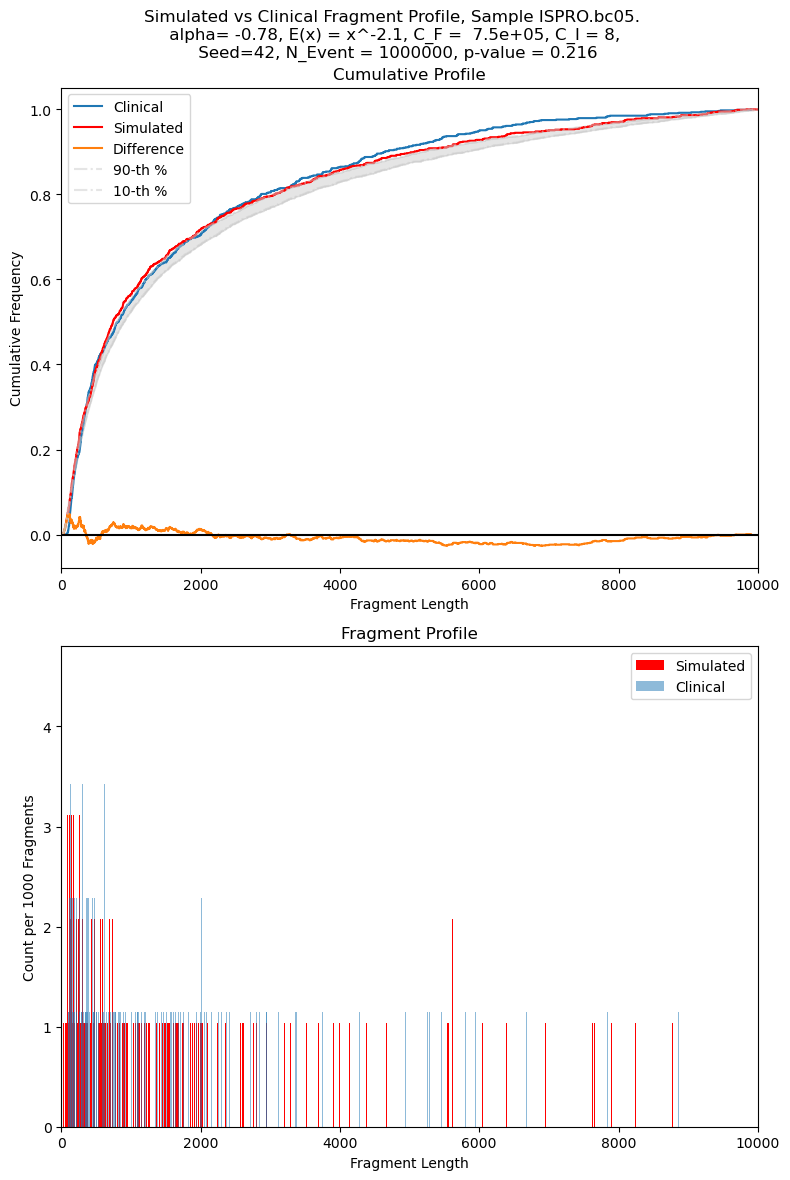

In [20]:
sim_list = np.round(x.Frag_lens)
from scipy import stats
p_value = stats.ks_2samp(clin_list,sim_list)[1]
up_bound = np.percentile(sim_mat, 75, axis=0)
low_bound = np.percentile(sim_mat, 25, axis=0)
mean = np.mean(sim_mat, axis=0)
sim_cdf = x.cum_dist(x_max, x_max)
fig, ax = plt.subplots(2,figsize=(8,12), dpi=100)
#############Plotting New Density Against Mean Density over Time ############################
ax[0].plot(range(clin_max+1),clin_ccf/clin_ccf[-1], label=f"Clinical")
ax[0].plot(range(x_max+1),sim_cdf, label = f"Simulated", color='r')
ax[0].plot(range(clin_max+1),sim_cdf[:clin_max+1]-clin_ccf/clin_ccf[-1], label='Difference')
ax[0].set_xlim(0,10000)
ax[0].set_xlabel('Fragment Length')
ax[0].set_ylabel('Cumulative Frequency')
ax[0].set_title('Cumulative Profile')
ax[0].plot(range(x_max+1),up_bound, linestyle='-.', alpha=0.5, color = '0.8',label='90-th %')
ax[0].plot(range(x_max+1),low_bound, linestyle='-.', alpha=0.5, color = '0.8',label='10-th %')
ax[0].fill_between(range(x_max+1), low_bound, up_bound, alpha=0.2, color = '0.5')      
ax[0].legend()
ax[0].axhline(0, color='k')
ax[1].set_xlim(0,10000)
ax[1].bar(range(x_max),np.diff(sim_cdf)*1000, label = f"Simulated",color='r', width=2)
ax[1].bar(range(clin_max)[:clin_max+1],np.diff(clin_ccf/clin_ccf[-1])*1000, label=f"Clinical", width=2, alpha=0.5)
#ax[1].plot(range(x_max),np.diff(mean)*1000, linestyle='-.', alpha=0.5, color = '0.8',label='Mean')
#ax[0].set_xlim(0,x_max)
ax[1].set_xlabel('Fragment Length')
ax[1].set_ylabel('Count per 1000 Fragments')
ax[1].set_title(f'Fragment Profile')
ax[1].legend()
#fig.suptitle(f'Simulated vs Clinical Fragment Profile, Sample ISPRO.bc05. \n alpha= {alpha_f: .2f}, E(x) = x^{alpha_e:.1f}-{B_ex}^{alpha_e:.1f}, C_F = {frag_speed: .1e}, C_I = {imm_rate}, \n Seed={seed}, N_Event = {N_event}, p-value ={p_value: .3f}')
fig.suptitle(f'Simulated vs Clinical Fragment Profile, Sample ISPRO.bc05. \n alpha= {alpha_f: .2f}, E(x) = x^{alpha_e:.1f}, C_F = {frag_speed: .1e}, C_I = {imm_rate}, \n Seed={seed}, N_Event = {N_event}, p-value ={p_value: .3f}')
fig.tight_layout()
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.eps')
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.png')
fig.savefig('../Clinical Data Analysis/Individual Plots/ISPRObc05.pdf')

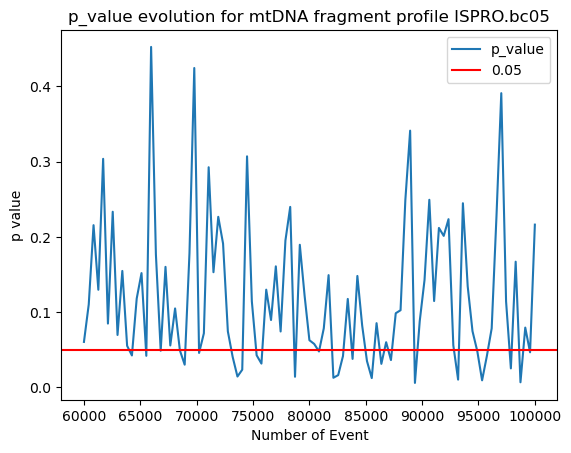

In [21]:
plt.plot(np.linspace(6*10**4,10*10**4,95),p_list, label='p_value')
plt.axhline(0.05, label='0.05', color='r')
plt.xlabel('Number of Event')
plt.ylabel('p value')
plt.title('p_value evolution for mtDNA fragment profile ISPRO.bc05')
plt.legend()
plt.savefig('../Clinical Data Analysis/p_value evolution/p_value_evol_mtDNA_ISPRO_bc05.png')

### Best Fit Simulation for ISPRO.S1

In [ ]:
from Frag_Ex_Imm_Func import *
from itertools import groupby
id = 'ISPRO.S1'
clin_data = df_chrM[df_chrM['id']==id] #chrM
clin_data = clin_data[clin_data['length_group']<=10000]
#clin_data = df_gDNA[df_gDNA['id']==id] #gDNA
display(clin_data)
clin_data = clin_data.sort_values('length_group') #For chrM Data
#clin_data = clin_data.sort_values('length') #For gDNA Data
clin_data['cumsum']=clin_data['freq'].cumsum()
clin_cum = clin_data[['length_group','cumsum']].to_numpy() #chrM
#clin_cum = clin_data[['length','cumsum']].to_numpy() #gDNA
clin_cum = np.append([[0,0]],clin_cum, axis=0)


############## Writing the cumulative count function from frequency table ##############################
#x_max = clin_data['length'].max() #gDNA
x_max = clin_data['length_group'].max() #mtDNA
clin_ccf = np.zeros(x_max+1)
for i in range(np.shape(clin_cum)[0]):
    clin_ccf[clin_cum[i,0]]=clin_cum[i,1]

for j in range(x_max+1):
    clin_ccf[j]=clin_ccf[0:j+1].max()

################ Generating list of fragment lengths (with repetition) from frequency table #########################
clin_list = []
#chrM
for length in clin_data['length_group']:
    clin_data_length = clin_data[clin_data['length_group']==length]
    clin_list += [length]*clin_data_length['freq'].to_numpy()[0]
#gDNA
#for length in clin_data['length']:
    #clin_data_length = clin_data[clin_data['length']==length]
    #clin_list += [length]*clin_data_length['freq'].to_numpy()[0]

In [ ]:
from datetime import datetime

time = int(datetime.timestamp(datetime.now()))
############################# Simulating Best Fit ################################
ex_max = 375
ex_slope = 16500
#B_ex = ex_max/ex_slope
N_split = 2
a=1
b=1
alpha_e = -2.05
xlim_max = 10000
B_ex= np.inf
alpha_f = -1.00
Nimm = 1
#x_max = clin_data['length_group'].max() #chrM
#x_max = clin_data['length'].max() #gDNA
#x_max=15507
x_max = 10000
frag_speed = 1000000
imm_rate = 11
KS_threshold = 0.01
Time_scale = 0.1
N_Group = x_max
Max_event = 10**6
N_event = 0
t=0
lin_ex=False
KS_list = []
time_list = []
plot=False
seed=42
np.random.seed(seed)
Prior_Count = 1
x = Frag_List(np.random.uniform(0,x_max, Prior_Count),np.zeros(Prior_Count))
clin_max = clin_data['length_group'].max() #chrM
#clin_max = clin_data['length'].max() #gDNA
Event_interval = 5*10000
sim_mat = np.zeros((int(Max_event/Event_interval)+1,x_max+1))
while N_event < Max_event:
    Event, Event_time = x.FragExIm(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate,t,lin_ex, B_ex, alpha_e, x_max = x_max)
    N_event +=1
    t += Event_time
    if N_event % Event_interval ==0:
        sim_cdf = x.cum_dist(x_max, x_max)
        time_list += [t]
        sim_mat[int(N_event/Event_interval),:]=sim_cdf
        if np.min(x.Frag_labs) != 0:
            KS_list += [KS_Dist(sim_cdf[:clin_max+1],clin_ccf/clin_ccf[-1])]
            print(f'# Event: {N_event}, Time: {t:.3f}, KS_dist: {KS_list[-1]:.3f}')
            print('Stationarity Reached')
            print(f'Oldest fragment immigrated at time {np.min(x.Frag_labs): .3e}')
            print(f'KS_mean: {np.mean(KS_list[-10:])}')
        if plot == True:
            plt.clf()
            plt.plot(sim_cdf, label='sim')
            plt.plot(clin_ccf[0:x_max+1]/clin_ccf[x_max+1], label='real')
            plt.legend()
            plt.show()
    

In [ ]:
plt.plot(KS_list)
plt.axhline(0.03)

In [ ]:
sim_list = np.round(x.Frag_lens)
#mean_list = np.round(Frag_list)
from scipy import stats
from scipy import stats
p_value = stats.ks_2samp(clin_list,sim_list)[1]
#p_value_mean = stats.ks_2samp(clin_list,mean_list)[1]
print(p_value)
list = [time, id, clin_list, sim_list, seed, N_event, KS_list[-1],p_value, ex_max,ex_slope,frag_speed,N_split,a,b,alpha_f,Nimm,imm_rate,lin_ex,B_ex,alpha_e,x_max]
sim_clin_df.loc[len(sim_clin_df)]=list
sim_clin_df.to_csv('../Clinical Data Analysis/Parameters CSV/sim_clin.csv', index=False)
#print(p_value, p_value_mean)


In [ ]:
sim_list = np.round(x.Frag_lens)
#mean_list = np.round(Frag_list)
from scipy import stats
p_value = stats.ks_2samp(clin_list,sim_list)[1]
print(p_value)
x_max = 9989
up_bound = np.percentile(sim_mat, 75, axis=0)
low_bound = np.percentile(sim_mat, 25, axis=0)
mean = np.mean(sim_mat, axis=0)
sim_cdf = x.cum_dist(x_max, x_max)[:9990]
fig, ax = plt.subplots(2,figsize=(8,12), dpi=100)
#############Plotting New Density Against Mean Density over Time ############################
ax[0].plot(range(clin_max+1),clin_ccf/clin_ccf[-1], label=f"Clinical")
ax[0].plot(range(x_max+1),sim_cdf, label = f"Simulated", color='r')
ax[0].plot(range(x_max+1),sim_cdf-clin_ccf/clin_ccf[-1], label='Difference')
ax[0].set_xlim(0,10000)
ax[0].set_xlabel('Fragment Length')
ax[0].set_ylabel('Cumulative Frequency')
ax[0].set_title('Cumulative Profile')
ax[0].plot(range(x_max+1),up_bound[:9990], linestyle='-.', alpha=0.5, color = '0.8',label='75-th %')
ax[0].plot(range(x_max+1),low_bound[:9990], linestyle='-.', alpha=0.5, color = '0.8',label='25-th %')
ax[0].fill_between(range(x_max+1), low_bound[:9990], up_bound[:9990], alpha=0.2, color = '0.5')      
ax[0].legend()
ax[0].axhline(0, color='k')
ax[1].set_xlim(0,10000)
ax[1].bar(range(x_max),np.diff(sim_cdf)*1000, label = f"Simulated",color='r', width=2)
ax[1].bar(range(clin_max),np.diff(clin_ccf/clin_ccf[-1])*1000, label=f"Clinical", width=2, alpha=0.5)
#ax[1].plot(range(x_max),np.diff(mean)*1000, linestyle='-.', alpha=0.5, color = '0.8',label='Mean')
#ax[0].set_xlim(0,x_max)
ax[1].set_xlabel('Fragment Length')
ax[1].set_ylabel('Count per 1000 Fragments')
ax[1].set_title(f'Fragment Profile')
ax[1].legend()
#fig.suptitle(f'Simulated vs Clinical Fragment Profile, Sample ISPRO.S1. \n alpha= {alpha_f: .3f}, E(x) = x^{alpha_e:.1f}-{B_ex}^{alpha_e:.1f}, C_F = {frag_speed: .1e}, C_I = {imm_rate}, r~ Beta({a},{b}) \n Seed={seed}, N_Event = {N_event}, p-value ={p_value: .3f}')
fig.suptitle(f'Simulated vs Clinical Fragment Profile, Sample ISPRO.S1. \n alpha= {alpha_f: .3f}, E(x) = x^{alpha_e:.2f}, C_F = {frag_speed: .1e}, C_I = {imm_rate}, r~ Beta({a},{b}) \n Seed={seed}, N_Event = {N_event}, p-value ={p_value: .3f}')

fig.tight_layout()
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.eps')
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.png')

### Best Fit Simulation for Sample ISPRO.bc03

In [ ]:
from Frag_Ex_Imm_Func import *
from itertools import groupby
id = 'ISPRO.bc03'
clin_data = df_chrM[df_chrM['id']==id] #chrM
clin_data = clin_data[clin_data['length_group']<=10000]
#clin_data = df_gDNA[df_gDNA['id']==id] #gDNA
display(clin_data)
clin_data = clin_data.sort_values('length_group') #For chrM Data
#clin_data = clin_data.sort_values('length') #For gDNA Data
clin_data['cumsum']=clin_data['freq'].cumsum()
clin_cum = clin_data[['length_group','cumsum']].to_numpy() #chrM
#clin_cum = clin_data[['length','cumsum']].to_numpy() #gDNA
clin_cum = np.append([[0,0]],clin_cum, axis=0)


############## Writing the cumulative count function from frequency table ##############################
#x_max = clin_data['length'].max() 
x_max = clin_data['length_group'].max() 

clin_ccf = np.zeros(x_max+1)
for i in range(np.shape(clin_cum)[0]):
    clin_ccf[clin_cum[i,0]]=clin_cum[i,1]

for j in range(x_max+1):
    clin_ccf[j]=clin_ccf[0:j+1].max()

################ Generating list of fragment lengths (with repetition) from frequency table #########################
clin_list = []
#chrM
for length in clin_data['length_group']:
    clin_data_length = clin_data[clin_data['length_group']==length]
    clin_list += [length]*clin_data_length['freq'].to_numpy()[0]
#gDNA
#for length in clin_data['length']:
    #clin_data_length = clin_data[clin_data['length']==length]
    #clin_list += [length]*clin_data_length['freq'].to_numpy()[0]

In [ ]:
from datetime import datetime

time = int(datetime.timestamp(datetime.now()))
############################# Simulating Best Fit ################################
ex_max = 135
ex_slope = 16500
#B_ex = ex_max/ex_slope
N_split = 2
a=1
b=1
alpha_e = -2.1
xlim_max = 10000
B_ex= np.inf
alpha_f = -0.50
Nimm = 1
clin_max = clin_data['length_group'].max() #chrM
x_max=10000
#x_max = clin_data['length'].max() #gDNA
#x_max=15507
#x_max = 8000
frag_speed = 100000
imm_rate = 10
KS_threshold = 0.01
Time_scale = 0.1
N_Group = x_max
Max_event = 10**6
N_event = 0
t=0
lin_ex=False
KS_list = []
time_list = []
plot=False
seed=42
np.random.seed(seed)
Prior_Count = 1
x = Frag_List(np.random.uniform(0,x_max, Prior_Count),np.zeros(Prior_Count))
clin_max = clin_data['length_group'].max() #chrM
#clin_max = clin_data['length'].max() #gDNA
Event_interval = 5*10000
sim_mat = np.zeros((int(Max_event/Event_interval)+1,x_max+1))
while N_event < Max_event:
    Event, Event_time = x.FragExIm(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate,t,lin_ex, B_ex, alpha_e, x_max = x_max)
    N_event +=1
    t += Event_time
    if N_event % Event_interval ==0:
        sim_cdf = x.cum_dist(x_max, x_max)
        time_list += [t]
        sim_mat[int(N_event/Event_interval),:]=sim_cdf
        if np.min(x.Frag_labs) != 0:
            KS_list += [KS_Dist(sim_cdf[:clin_max+1],clin_ccf/clin_ccf[-1])]
            print(f'# Event: {N_event}, Time: {t:.3f}, KS_dist: {KS_list[-1]:.3f}')
            print('Stationarity Reached')
            print(f'Oldest fragment immigrated at time {np.min(x.Frag_labs): .3e}')
            print(f'KS_mean: {np.mean(KS_list)}')
        if plot == True:
            plt.clf()
            plt.plot(sim_cdf, label='sim')
            plt.plot(clin_ccf[0:x_max+1]/clin_ccf[x_max+1], label='real')
            plt.legend()
            plt.show()
    

In [ ]:
sim_list = np.round(x.Frag_lens)
#mean_list = np.round(Frag_list)
from scipy import stats
p_value = stats.ks_2samp(clin_list,sim_list)[1]
#p_value_mean = stats.ks_2samp(clin_list,mean_list)[1]
print(p_value)
list = [time, id, clin_list, sim_list, seed, N_event, KS_list[-1],p_value, ex_max,ex_slope,frag_speed,N_split,a,b,alpha_f,Nimm,imm_rate,lin_ex,B_ex,alpha_e,x_max]
sim_clin_df.loc[len(sim_clin_df)]=list
sim_clin_df.to_csv('../Clinical Data Analysis/Parameters CSV/sim_clin.csv', index=False)
#print(p_value, p_value_mean)


In [ ]:
print(sim_cdf.shape)
print(x_max)

In [ ]:
up_bound = np.percentile(sim_mat, 90, axis=0)
low_bound = np.percentile(sim_mat, 10, axis=0)
mean = np.mean(sim_mat, axis=0)
sim_cdf = x.cum_dist(x_max, x_max)
fig, ax = plt.subplots(2,figsize=(8,12), dpi=100)
#############Plotting New Density Against Mean Density over Time ############################
ax[0].plot(range(clin_max+1),clin_ccf/clin_ccf[-1], label=f"Clinical")
ax[0].plot(range(x_max+1),sim_cdf, label = f"Simulated", color='r')
ax[0].plot(range(clin_max+1),sim_cdf[:clin_max+1]-clin_ccf/clin_ccf[-1], label='Difference')
ax[0].set_xlim(10,10000)
ax[0].set_xlabel('Fragment Length')
ax[0].set_ylabel('Cumulative Frequency')
ax[0].set_title('Cumulative Profile')
ax[0].plot(range(x_max+1),up_bound, linestyle='-.', alpha=0.5, color = '0.8',label='90-th %')
ax[0].plot(range(x_max+1),low_bound, linestyle='-.', alpha=0.5, color = '0.8',label='10-th %')
ax[0].fill_between(range(x_max+1), low_bound, up_bound, alpha=0.2, color = '0.5')      
ax[0].legend()
ax[0].axhline(0, color='k')
ax[1].set_xlim(10,10000)
ax[1].bar(range(x_max),np.diff(sim_cdf)*1000, label = f"Simulated",color='r', width=2)
ax[1].bar(range(clin_max),np.diff(clin_ccf/clin_ccf[-1])*1000, label=f"Clinical", width=2, alpha=0.5)
#ax[1].plot(range(x_max),np.diff(mean)*1000, linestyle='-.', alpha=0.5, color = '0.8',label='Mean')
#ax[0].set_xlim(0,x_max)
ax[1].set_xlabel('Fragment Length')
ax[1].set_ylabel('Count per 1000 Fragments')
ax[1].set_title(f'Fragment Profile')
ax[1].legend()
fig.suptitle(f'Simulated vs Clinical Fragment Profile, Sample ISPRO.bc03. \n alpha= {alpha_f: .2f}, E(x) = x^{alpha_e:.1f}, C_F = {frag_speed: .1e}, C_I = {imm_rate}, r~ Beta({a},{b}) \n Seed={seed}, N_Event = {N_event}, p-value ={p_value: .3f}')
fig.tight_layout()
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.eps')
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.png')

### Best Fit Simulation for Sample ISPRO.bc01

In [ ]:
from Frag_Ex_Imm_Func import *
from itertools import groupby
id = 'ISPRO.bc01'
clin_data = df_chrM[df_chrM['id']==id] #chrM
clin_data = clin_data[clin_data['length_group']<=10000]
#clin_data = df_gDNA[df_gDNA['id']==id] #gDNA
display(clin_data)
clin_data = clin_data.sort_values('length_group') #For chrM Data
#clin_data = clin_data.sort_values('length') #For gDNA Data
clin_data['cumsum']=clin_data['freq'].cumsum()
clin_cum = clin_data[['length_group','cumsum']].to_numpy() #chrM
#clin_cum = clin_data[['length','cumsum']].to_numpy() #gDNA
clin_cum = np.append([[0,0]],clin_cum, axis=0)


############## Writing the cumulative count function from frequency table ##############################
#x_max = clin_data['length'].max() #gDNA
x_max = clin_data['length_group'].max() #mtDNA
clin_ccf = np.zeros(x_max+1)
for i in range(np.shape(clin_cum)[0]):
    clin_ccf[clin_cum[i,0]]=clin_cum[i,1]

for j in range(x_max+1):
    clin_ccf[j]=clin_ccf[0:j+1].max()

################ Generating list of fragment lengths (with repetition) from frequency table #########################
clin_list = []
#chrM
for length in clin_data['length_group']:
    clin_data_length = clin_data[clin_data['length_group']==length]
    clin_list += [length]*clin_data_length['freq'].to_numpy()[0]
#gDNA
#for length in clin_data['length']:
    #clin_data_length = clin_data[clin_data['length']==length]
    #clin_list += [length]*clin_data_length['freq'].to_numpy()[0]

In [ ]:
from datetime import datetime

time = int(datetime.timestamp(datetime.now()))
############################# Simulating Best Fit ################################
ex_max = 110
ex_slope = 16500
#B_ex = ex_max/ex_slope
N_split = 2
a=1
b=1
alpha_e = -2.5
xlim_max = 4000
B_ex= 115
alpha_f = 0.36
Nimm = 1
clin_max = clin_data['length_group'].max() #chrM
x_max = 10000
#x_max = clin_data['length'].max() #gDNA
#x_max=15507
#x_max = 8000
frag_speed = 1000
imm_rate = 10
KS_threshold = 0.01
Time_scale = 0.1
N_Group = x_max
Max_event = 10**6
N_event = 0
t=0
lin_ex=False
KS_list = [0.1]
time_list = []
plot=False
seed=42
np.random.seed(seed)
Prior_Count = 1
x = Frag_List(np.random.uniform(0,x_max, Prior_Count),np.zeros(Prior_Count))
clin_max = clin_data['length_group'].max() #chrM
#clin_max = clin_data['length'].max() #gDNA
Event_interval = 10000
sim_mat = np.zeros((int(Max_event/Event_interval)+1,x_max+1))
while N_event < Max_event:
    Event, Event_time = x.FragExIm(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate,t,lin_ex, B_ex, alpha_e, x_max = x_max)
    N_event +=1
    t += Event_time
    if N_event % Event_interval ==0:
        sim_cdf = x.cum_dist(x_max, x_max)
        time_list += [t]
        sim_mat[int(N_event/Event_interval),:]=sim_cdf
        if np.min(x.Frag_labs) != 0:
            KS_list += [KS_Dist(sim_cdf[:clin_max+1],clin_ccf/clin_ccf[-1])]
            print(f'# Event: {N_event}, Time: {t:.3f}, KS_dist: {KS_list[-1]:.3f}')
            print('Stationarity Reached')
            print(f'Oldest fragment immigrated at time {np.min(x.Frag_labs): .3e}')
            print(f'KS_mean: {np.mean(KS_list)}')
        if plot == True:
            plt.clf()
            plt.plot(sim_cdf, label='sim')
            plt.plot(clin_ccf[0:x_max+1]/clin_ccf[x_max+1], label='real')
            plt.legend()
            plt.show()
    

In [ ]:
sim_list = np.round(x.Frag_lens)
#mean_list = np.round(Frag_list)
from scipy import stats
p_value = stats.ks_2samp(clin_list,sim_list)[1]
#p_value_mean = stats.ks_2samp(clin_list,mean_list)[1]
print(p_value)
list = [time, id, clin_list, sim_list, seed, N_event, KS_list[-1],p_value, ex_max,ex_slope,frag_speed,N_split,a,b,alpha_f,Nimm,imm_rate,lin_ex,B_ex,alpha_e,x_max]
sim_clin_df.loc[len(sim_clin_df)]=list
sim_clin_df.to_csv('../Clinical Data Analysis/Parameters CSV/sim_clin.csv', index=False)
#print(p_value, p_value_mean)


In [ ]:
up_bound = np.percentile(sim_mat, 75, axis=0)
low_bound = np.percentile(sim_mat, 25, axis=0)
mean = np.mean(sim_mat, axis=0)
sim_cdf = x.cum_dist(x_max, x_max)
fig, ax = plt.subplots(2,figsize=(8,12), dpi=100)
#############Plotting New Density Against Mean Density over Time ############################
ax[0].plot(range(clin_max+1),clin_ccf/clin_ccf[-1], label=f"Clinical")
ax[0].plot(range(x_max+1),sim_cdf, label = f"Simulated", color='r')
ax[0].plot(range(clin_max+1),sim_cdf[:clin_max+1]-clin_ccf/clin_ccf[-1], label='Difference')
ax[0].set_xlim(0,4000)
ax[0].set_xlabel('Fragment Length')
ax[0].set_ylabel('Cumulative Frequency')
ax[0].set_title('Cumulative Profile')
ax[0].plot(range(x_max+1),up_bound, linestyle='-.', alpha=0.5, color = '0.8',label='75-th %')
ax[0].plot(range(x_max+1),low_bound, linestyle='-.', alpha=0.5, color = '0.8',label='25-th %')
ax[0].fill_between(range(x_max+1), low_bound, up_bound, alpha=0.2, color = '0.5')      
ax[0].legend()
ax[0].axhline(0, color='k')
ax[1].set_xlim(0,4000)
ax[1].bar(range(x_max),np.diff(sim_cdf)*1000, label = f"Simulated",color='r', width=2)
ax[1].bar(range(clin_max),np.diff(clin_ccf/clin_ccf[-1])*1000, label=f"Clinical", width=2, alpha=0.5)
#ax[1].plot(range(x_max),np.diff(mean)*1000, linestyle='-.', alpha=0.5, color = '0.8',label='Mean')
#ax[0].set_xlim(0,x_max)
ax[1].set_xlabel('Fragment Length')
ax[1].set_ylabel('Count per 1000 Fragments')
ax[1].set_title(f'Fragment Profile')
ax[1].legend()
fig.suptitle(f'Simulated vs Clinical Fragment Profile, Sample ISPRO.bc01. \n alpha= {alpha_f: .2f}, E(x) = x^{alpha_e:.1f}-{B_ex}^{alpha_e:.1f}, C_F = {frag_speed: .1e}, C_I = {imm_rate}, r~ Beta({a},{b}) \n Seed={seed}, N_Event = {N_event}, p-value ={p_value: .3f}')
fig.tight_layout()
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.eps')
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.png')

### mtDNA summary



In [ ]:
sim_fit_df = sim_clin_df[sim_clin_df['p-value']>=0.1]
sim_fit_df.sort_values(by=['p-value'])
sim_fit_df = sim_fit_df[sim_fit_df['x_max']==10000]
sim_fit_df = sim_fit_df[sim_fit_df['B_ex']!='100000000000000000000']
sim_fit_df = sim_fit_df[sim_fit_df['N_event']==10**6]
sim_fit_df = sim_fit_df.drop(['ex_slope','clin_list','sim_list','ex_max','N_split','lin_ex','Nimm','time'],axis=1)
sim_fit_df = sim_fit_df.round(3)
sim_fit_df.to_csv('../Clinical Data Analysis/Parameters CSV/sim_fit_mtDNA.csv', index=False)

## gDNA FRIME Best Fit Simulation

We now try to use our FRIME process simulation to simulate the fragment profiles.

We only work on gDNA dataset for ISPRO.bc05。





In [22]:
#Only use the following two lines to re-create a new sim_clin_df file
#sim_clin_gDNA = pd.DataFrame(columns = ['time','id','clin_list','sim_list','seed','N_event','KS_dist','p-value','ex_max','ex_slope','frag_speed','N_split','a','b','alpha_f','Nimm','imm_rate','lin_ex','B_ex','alpha_e','x_max'])
#sim_clin_gDNA.to_csv('../Clinical Data Analysis/Parameters CSV/sim_clin_gDNA.csv', index=False)


sim_clin_gDNA = pd.read_csv('../Clinical Data Analysis/Parameters CSV/sim_clin_gDNA.csv')
display(sim_clin_gDNA)


time          id                                          clin_list  \
0  1684277764  ISPRO.bc05  [125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125...   
1  1684951850  ISPRO.bc05  [125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125...   
2  1686142110  ISPRO.bc05  [125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125...   

                                            sim_list  seed  N_event   KS_dist  \
0  [125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125...    42  1000000  0.013393   
1  [125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125...    42  1000000  0.013393   
2  [125.0, 125.0, 125.0, 125.0, 125.0, 125.0, 125...    42  1000000  0.013393   

    p-value  ex_max  ex_slope  ...  N_split  a  b  alpha_f  Nimm  imm_rate  \
0  0.496804     140     16500  ...        2  1  1      1.2     1        10   
1  0.496804     140     16500  ...        2  1  1      1.2     1        10   
2  0.496804     140     16500  ...        2  1  1      1.2     1        10   

   lin_ex  B_ex  alpha_e  x_max  
0   False   167       -2  10000  
1   False   167       -2  10000  
2   False   167       -2  10000  

[3 rows x 21 columns]

In [23]:
from Frag_Ex_Imm_Func import *
from itertools import groupby
id = 'ISPRO.bc05'
clin_data_full = df_gDNA_full[df_gDNA_full['id']==id]
clin_data_full = clin_data_full[clin_data_full['length']<=10000]
clin_data_full.sort_values(by='length')
display(clin_data_full)
clin_length_full = clin_data_full['length'].to_numpy()
clin_freq_full = clin_data_full['freq'].to_numpy()

clin_data = df_gDNA[df_gDNA['id']==id] #gDNA
clin_data = clin_data[clin_data['length_group']<=10000]
display(clin_data)
clin_data = clin_data.sort_values('length_group')
clin_data['cumsum']=clin_data['freq'].cumsum()
clin_cum = clin_data[['length_group','cumsum']].to_numpy() 
clin_cum = np.append([[0,0]],clin_cum, axis=0)


############## Writing the cumulative count function from frequency table ##############################
#x_max = clin_data['length'].max() #gDNA
x_max = clin_data['length_group'].max() #mtDNA
clin_ccf = np.zeros(int(x_max+1))
for i in range(np.shape(clin_cum)[0]):
    clin_ccf[int(clin_cum[i,0])]=clin_cum[i,1]

for j in range(int(x_max+1)):
    clin_ccf[j]=clin_ccf[0:j+1].max()

################ Generating list of fragment lengths (with repetition) from frequency table #########################
clin_list = []
#chrM
for length in clin_data['length_group']:
    clin_data_length = clin_data[clin_data['length_group']==length]
    clin_list += [length]*clin_data_length['freq'].to_numpy()[0]

# gDNA
#for length in clin_data['length']:
    #clin_data_length = clin_data[clin_data['length']==length]
    #clin_list += [length]*clin_data_length['freq'].to_numpy()[0]

clin_count = clin_data['freq'].to_numpy()
clin_length = clin_data['length_group'].to_numpy()
print(clin_count)

Unnamed: 0          id   chr  length  freq     study        condition  \
47025       47025  ISPRO.bc05  gDNA      42     3  nanopore  Healthy control   
47026       47026  ISPRO.bc05  gDNA      44     9  nanopore  Healthy control   
47027       47027  ISPRO.bc05  gDNA      47     7  nanopore  Healthy control   
47028       47028  ISPRO.bc05  gDNA      48    21  nanopore  Healthy control   
47029       47029  ISPRO.bc05  gDNA      49    22  nanopore  Healthy control   
...           ...         ...   ...     ...   ...       ...              ...   
55498       55498  ISPRO.bc05  gDNA    8986     1  nanopore  Healthy control   
55499       55499  ISPRO.bc05  gDNA    9390     1  nanopore  Healthy control   
55500       55500  ISPRO.bc05  gDNA    9391     1  nanopore  Healthy control   
55501       55501  ISPRO.bc05  gDNA    9863     1  nanopore  Healthy control   
55502       55502  ISPRO.bc05  gDNA    9874     1  nanopore  Healthy control   

      detail specimen          prob  prob x10e6  
47025    ONT   Plasma  7.610167e-07    0.761017  
47026    ONT   Plasma  2.536722e-07    0.253672  
47027    ONT   Plasma  1.268361e-06    1.268361  
47028    ONT   Plasma  1.268361e-06    1.268361  
47029    ONT   Plasma  5.073444e-07    0.507344  
...      ...      ...           ...         ...  
55498    ONT   Plasma  2.528432e-07    0.252843  
55499    ONT   Plasma  2.528432e-07    0.252843  
55500    ONT   Plasma  2.528432e-07    0.252843  
55501    ONT   Plasma  2.528432e-07    0.252843  
55502    ONT   Plasma  2.528432e-07    0.252843  

[7315 rows x 11 columns]

id   chr  length_group length_interval     study  \
580  ISPRO.bc05  gDNA         125.0        [0, 250]  nanopore   
581  ISPRO.bc05  gDNA         335.0      [250, 420]  nanopore   
582  ISPRO.bc05  gDNA         520.0      [420, 620]  nanopore   
583  ISPRO.bc05  gDNA         720.0      [620, 820]  nanopore   
584  ISPRO.bc05  gDNA         920.0     [820, 1020]  nanopore   
585  ISPRO.bc05  gDNA        1120.0    [1020, 1220]  nanopore   
586  ISPRO.bc05  gDNA        1320.0    [1220, 1420]  nanopore   
587  ISPRO.bc05  gDNA        1520.0    [1420, 1620]  nanopore   
588  ISPRO.bc05  gDNA        1720.0    [1620, 1820]  nanopore   
589  ISPRO.bc05  gDNA        1920.0    [1820, 2020]  nanopore   
590  ISPRO.bc05  gDNA        2120.0    [2020, 2220]  nanopore   
591  ISPRO.bc05  gDNA        2320.0    [2220, 2420]  nanopore   
592  ISPRO.bc05  gDNA        2520.0    [2420, 2620]  nanopore   
593  ISPRO.bc05  gDNA        2720.0    [2620, 2820]  nanopore   
594  ISPRO.bc05  gDNA        2920.0    [2820, 3020]  nanopore   
595  ISPRO.bc05  gDNA        3120.0    [3020, 3220]  nanopore   
596  ISPRO.bc05  gDNA        3320.0    [3220, 3420]  nanopore   
597  ISPRO.bc05  gDNA        3520.0    [3420, 3620]  nanopore   
598  ISPRO.bc05  gDNA        3720.0    [3620, 3820]  nanopore   
599  ISPRO.bc05  gDNA        3920.0    [3820, 4020]  nanopore   
600  ISPRO.bc05  gDNA        4120.0    [4020, 4220]  nanopore   
601  ISPRO.bc05  gDNA        4320.0    [4220, 4420]  nanopore   
602  ISPRO.bc05  gDNA        4520.0    [4420, 4620]  nanopore   
603  ISPRO.bc05  gDNA        4720.0    [4620, 4820]  nanopore   
604  ISPRO.bc05  gDNA        4920.0    [4820, 5020]  nanopore   
605  ISPRO.bc05  gDNA        5120.0    [5020, 5220]  nanopore   
606  ISPRO.bc05  gDNA        5320.0    [5220, 5420]  nanopore   
607  ISPRO.bc05  gDNA        5520.0    [5420, 5620]  nanopore   
608  ISPRO.bc05  gDNA        5720.0    [5620, 5820]  nanopore   
609  ISPRO.bc05  gDNA        5920.0    [5820, 6020]  nanopore   
610  ISPRO.bc05  gDNA        6120.0    [6020, 6220]  nanopore   
611  ISPRO.bc05  gDNA        6320.0    [6220, 6420]  nanopore   
612  ISPRO.bc05  gDNA        6520.0    [6420, 6620]  nanopore   
613  ISPRO.bc05  gDNA        6720.0    [6620, 6820]  nanopore   
614  ISPRO.bc05  gDNA        6920.0    [6820, 7020]  nanopore   
615  ISPRO.bc05  gDNA        7120.0    [7020, 7220]  nanopore   
616  ISPRO.bc05  gDNA        7320.0    [7220, 7420]  nanopore   
617  ISPRO.bc05  gDNA        7520.0    [7420, 7620]  nanopore   
618  ISPRO.bc05  gDNA        7720.0    [7620, 7820]  nanopore   
619  ISPRO.bc05  gDNA        7920.0    [7820, 8020]  nanopore   
620  ISPRO.bc05  gDNA        8120.0    [8020, 8220]  nanopore   
621  ISPRO.bc05  gDNA        8320.0    [8220, 8420]  nanopore   
622  ISPRO.bc05  gDNA        8520.0    [8420, 8620]  nanopore   
623  ISPRO.bc05  gDNA        8720.0    [8620, 8820]  nanopore   
624  ISPRO.bc05  gDNA        8920.0    [8820, 9020]  nanopore   
625  ISPRO.bc05  gDNA        9120.0    [9020, 9220]  nanopore   
626  ISPRO.bc05  gDNA        9320.0    [9220, 9420]  nanopore   
627  ISPRO.bc05  gDNA        9520.0    [9420, 9620]  nanopore   
628  ISPRO.bc05  gDNA        9720.0    [9620, 9820]  nanopore   
629  ISPRO.bc05  gDNA        9920.0   [9820, 10020]  nanopore   

           condition detail specimen  length_width     freq      prob  \
580  Healthy control    ONT   Plasma           250  4529428  0.000151   
581  Healthy control    ONT   Plasma           170  1077824  0.000287   
582  Healthy control    ONT   Plasma           200   316496  0.000216   
583  Healthy control    ONT   Plasma           200   117551  0.000170   
584  Healthy control    ONT   Plasma           200    52218  0.000158   
585  Healthy control    ONT   Plasma           200    27790  0.000113   
586  Healthy control    ONT   Plasma           200    16345  0.000105   
587  Healthy control    ONT   Plasma           200    10480  0.000081   
588  Healthy control    ONT   Plasma    

[4529428 1077824  316496  117551   52218   27790   16345   10480    7241
    5272    4097    3134    2583    2062    1799    1413    1255    1106
     931     774     729     655     555     499     474     391     322
     311     282     284     229     218     185     166     151     138
     127     109     112     106     100      59      80      61      63
      62      49      52      40      45]


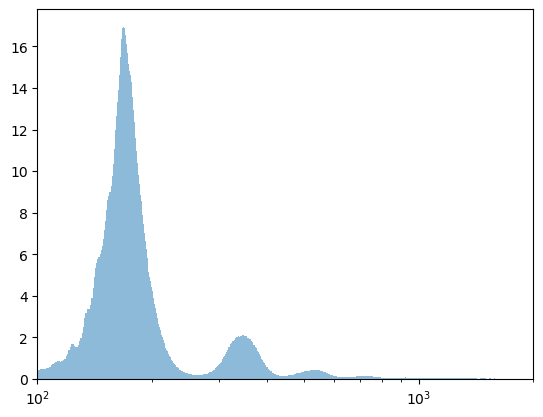

In [24]:
# Individual Plot

plt.bar(clin_length_full,clin_freq_full/np.sum(clin_freq_full)*1000, label=f"Clinical", width=1, alpha=0.5)
plt.xlim([100,2000])
plt.xscale('log')
plt.savefig('../Clinical Data Analysis/Individual Plots/ISPRO_bc05_clean_log.png')

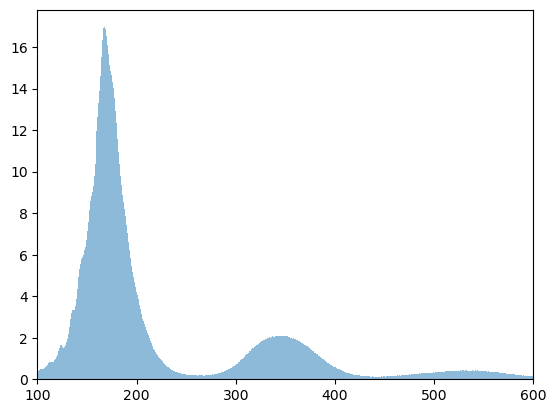

In [25]:
# Individual Plot

plt.bar(clin_length_full,clin_freq_full/np.sum(clin_freq_full)*1000, label=f"Clinical", width=1, alpha=0.5)
plt.xlim([100,600])
plt.savefig('../Clinical Data Analysis/Individual Plots/ISPRO_bc05_clean.png')

In [26]:
from datetime import datetime
from scipy import stats
time = int(datetime.timestamp(datetime.now()))
############################# Simulating Best Fit ################################
ex_max = 140
ex_slope = 16500
#B_ex = ex_max/ex_slope
N_split = 2
a=1
b=1
alpha_e = -2
B_ex= 167
alpha_f = 1.20
Nimm = 1
#x_max = int(clin_data['length_group'].max())
#x_max = clin_data['length'].max() #gDNA
x_max = 10000
#x_max=15507
#x_max = 8000
frag_speed = 2.5
imm_rate = 10
KS_threshold = 0.01
Time_scale = 0.1
N_Group = x_max
Max_event = 10**6
N_event = 0
t=0
gDNA_bin = [0, 250] + [int(x) for x in range(420, 10200, 200)]
lin_ex=False
KS_list = [0.02]
chi2_list = [0.02]
p_list = [0]
time_list = []
plot=False
seed=42
np.random.seed(seed)
Prior_Count = 1
x = Frag_List(np.random.uniform(0,x_max, Prior_Count),np.zeros(Prior_Count))
clin_max = clin_data['length_group'].max() #chrM
#clin_max = clin_data['length'].max() #gDNA
Event_interval = 10000
sim_mat = np.zeros((int(Max_event/Event_interval)+1,int(x_max)+1))
while N_event < Max_event:
    Event, Event_time = x.FragExIm(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate,t,lin_ex, B_ex, alpha_e, x_max = x_max)
    N_event +=1
    t += Event_time
    if N_event % Event_interval ==0:
        sim_count, edges = np.histogram(x.Frag_lens,bins=gDNA_bin,density=False)
        sim_list=[(gDNA_bin[int(x)-1]+gDNA_bin[int(x)])/2 for x in np.digitize(x.Frag_lens,gDNA_bin, right=True)]
        chi2_stat = stats.chisquare(f_obs = sim_count[0:3], f_exp=clin_count[0:3]/np.sum(clin_count[0:3])*np.sum(sim_count[0:3]))[0]
        chi2_p = stats.chisquare(f_obs = sim_count[0:3], f_exp=clin_count[0:3]/np.sum(clin_count[0:3])*np.sum(sim_count[0:3]))[1]
        KS_statistics, KS_p = stats.ks_2samp(sim_list,clin_list)
        time_list += [t]
        print(f'# Event: {N_event}, Time: {t:.3e}, KS_dist: {KS_statistics:.3f}, KS p-value: {KS_p:.3e}, chi2_stat = {chi2_stat:.1f}, chi2_p = {chi2_p:.2e}')
        KS_list += [KS_statistics]
        chi2_list += [chi2_stat]
        p_list +=[chi2_p]
        print(f'Oldest fragment immigrated at time {np.min(x.Frag_labs): .3e}')
        print(f'KS_mean: {np.mean(KS_list[-10:])}')

# Event: 10000, Time: 1.792e-03, KS_dist: 0.101, KS p-value: 2.113e-20, chi2_stat = 120.4, chi2_p = 7.34e-27
Oldest fragment immigrated at time  0.000e+00
KS_mean: 0.06039179139442396
# Event: 20000, Time: 2.718e-03, KS_dist: 0.055, KS p-value: 8.498e-09, chi2_stat = 42.4, chi2_p = 6.30e-10
Oldest fragment immigrated at time  0.000e+00
KS_mean: 0.058749773066252696
# Event: 30000, Time: 3.460e-03, KS_dist: 0.016, KS p-value: 3.135e-01, chi2_stat = 13.3, chi2_p = 1.27e-03
Oldest fragment immigrated at time  0.000e+00
KS_mean: 0.048103050086927
# Event: 40000, Time: 4.150e-03, KS_dist: 0.009, KS p-value: 8.796e-01, chi2_stat = 1.9, chi2_p = 3.87e-01
Oldest fragment immigrated at time  0.000e+00
KS_mean: 0.04036775245707143
# Event: 50000, Time: 4.788e-03, KS_dist: 0.013, KS p-value: 5.232e-01, chi2_stat = 3.4, chi2_p = 1.85e-01
Oldest fragment immigrated at time  0.000e+00
KS_mean: 0.035764124026489486
# Event: 60000, Time: 5.425e-03, KS_dist: 0.018, KS p-value: 1.470e-01, chi2_stat = 1.

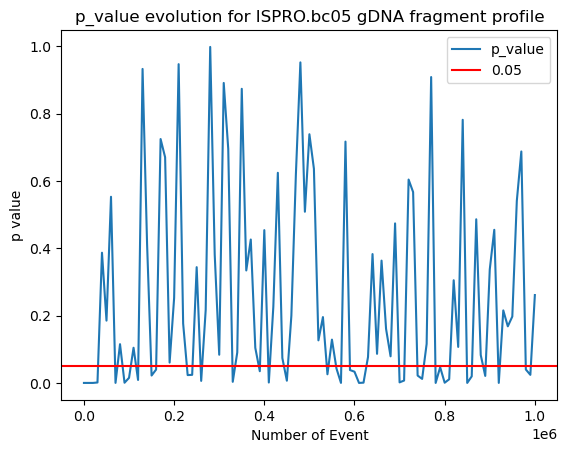

In [27]:
plt.plot(np.linspace(0,100*10**4,101),p_list, label='p_value')
plt.axhline(0.05, label='0.05', color='r')
plt.xlabel('Number of Event')
plt.ylabel('p value')
plt.title('p_value evolution for ISPRO.bc05 gDNA fragment profile')
plt.legend()
plt.savefig('../Clinical Data Analysis/p_value evolution/p_value_evol_gDNA_ISPRO_bc05.png')

In [28]:
p_value = KS_p

data = [time, id, clin_list, sim_list, seed, N_event, KS_list[-1],p_value, ex_max,ex_slope,frag_speed,N_split,a,b,alpha_f,Nimm,imm_rate,lin_ex,B_ex,alpha_e,x_max]
sim_clin_gDNA.loc[len(sim_clin_gDNA)]=data
sim_clin_gDNA.to_csv('../Clinical Data Analysis/Parameters CSV/sim_clin_gDNA.csv', index=False)
print(p_value)


0.49680369310550665


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


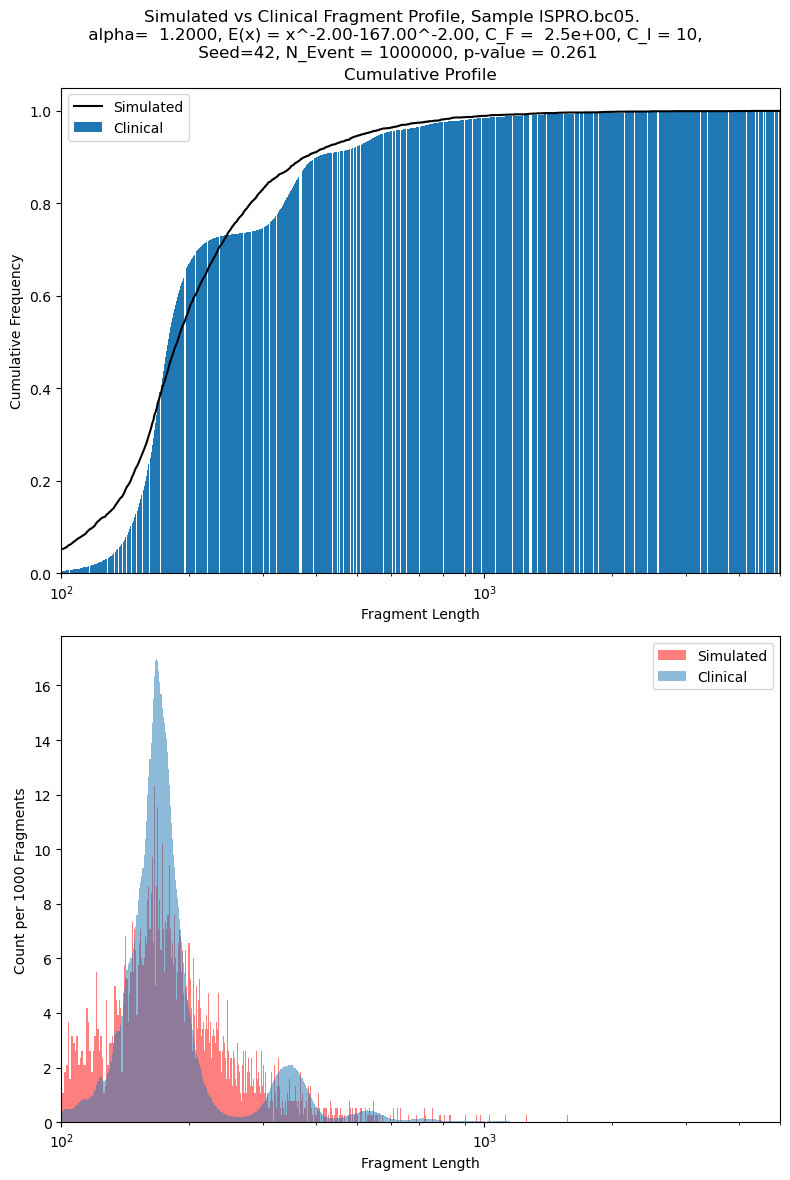

In [29]:
p_value = KS_p
sim_len_list, sim_count_list = np.unique(sim_list, return_counts=True)
sim_cum_count = sim_count_list.cumsum()
x_max = int(x_max)
clin_max = int(clin_max)
up_bound = np.percentile(sim_mat, 75, axis=0)
low_bound = np.percentile(sim_mat, 25, axis=0)
mean = np.mean(sim_mat, axis=0)
sim_cdf = x.cum_dist(x_max,x_max)
fig, ax = plt.subplots(2,figsize=(8,12), dpi=100)

#############Plotting New Density Against Mean Density over Time ############################
ax[0].bar(clin_length_full,np.cumsum(clin_freq_full)/np.sum(clin_freq_full), label=f"Clinical", width=0.9)
ax[0].plot(np.linspace(0,x_max,x_max+1),sim_cdf/sim_cdf[-1], label = f"Simulated", color='k')
#ax[0].plot(range(x_max+1),sim_cdf-clin_ccf/clin_ccf[-1], label='Difference')
#ax[0].set_xlim(0,8000)
ax[0].set_xlabel('Fragment Length')
ax[0].set_ylabel('Cumulative Frequency')
ax[0].set_title('Cumulative Profile')
ax[0].set_xscale('log')
#ax[0].plot(range(x_max+1),up_bound, linestyle='-.', alpha=0.5, color = '0.8',label='75-th %')
#ax[0].plot(range(x_max+1),low_bound, linestyle='-.', alpha=0.5, color = '0.8',label='25-th %')
#ax[0].fill_between(range(x_max+1), low_bound, up_bound, alpha=0.2, color = '0.5')      
ax[0].legend()
ax[1].set_xlim(100,5000)
ax[0].set_xlim(100,5000)
ax[1].bar(np.linspace(0,x_max,x_max+1)[1:],np.diff(sim_cdf)/sim_cdf[-1]*1000, label = f"Simulated",color='r', alpha=0.5, width=1)
ax[1].bar(clin_length_full,clin_freq_full/np.sum(clin_freq_full)*1000, label=f"Clinical", width=1, alpha=0.5)
#ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].bar(np.linspace(0,x_max,100), np.diff(sim_cdf)/sim_cdf[-1]*1000, label=f'Simulated', color='k', width=100)
#ax[1].plot(range(x_max),np.diff(mean)*1000, linestyle='-.', alpha=0.5, color = '0.8',label='Mean')
#ax[0].set_xlim(0,x_max)
ax[1].set_xlabel('Fragment Length')
ax[1].set_ylabel('Count per 1000 Fragments')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
plt.legend()
fig.suptitle(f'Simulated vs Clinical Fragment Profile, Sample ISPRO.bc05. \n alpha= {alpha_f: .4f}, E(x) = x^{alpha_e:.2f}-{B_ex:.2f}^{alpha_e:.2f}, C_F = {frag_speed: .1e}, C_I = {imm_rate}, \n Seed={seed}, N_Event = {N_event}, p-value ={chi2_p: .3f}')
fig.tight_layout()
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.eps')
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.png')
fig.savefig('../Clinical Data Analysis/Individual Plots/ISPRObc05_gDNA_full_cum.pdf')

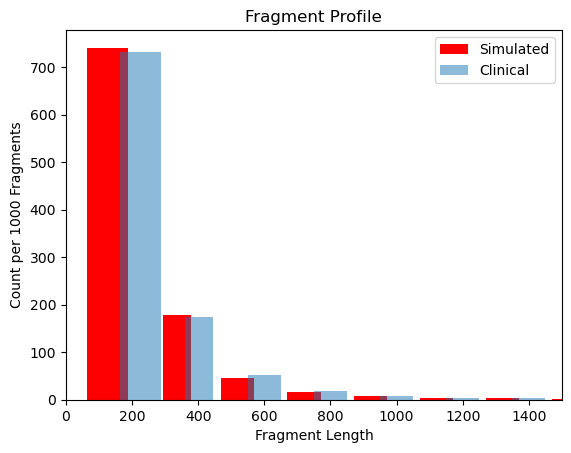

In [33]:
plt.bar(sim_len_list,sim_count_list/sim_cum_count[-1]*1000, label = f"Simulated",color='r', width=np.diff(gDNA_bin)[:len(sim_len_list)]*0.5)
plt.bar(clin_length+np.diff(gDNA_bin)*0.4,clin_count/np.sum(clin_count)*1000, label=f"Clinical", width=np.diff(gDNA_bin)*0.5, alpha=0.5)
#ax[1].bar(np.linspace(0,x_max,100), np.diff(sim_cdf)/sim_cdf[-1]*1000, label=f'Simulated', color='k', width=100)
#ax[1].plot(range(x_max),np.diff(mean)*1000, linestyle='-.', alpha=0.5, color = '0.8',label='Mean')
#ax[0].set_xlim(0,x_max)
plt.xlabel('Fragment Length')
plt.ylabel('Count per 1000 Fragments')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
plt.xlim([0,1500])
plt.title(f'Fragment Profile')
plt.legend()
plt.savefig('../Clinical Data Analysis/Individual Plots/ISPRObc05_sim_clin_bar.pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


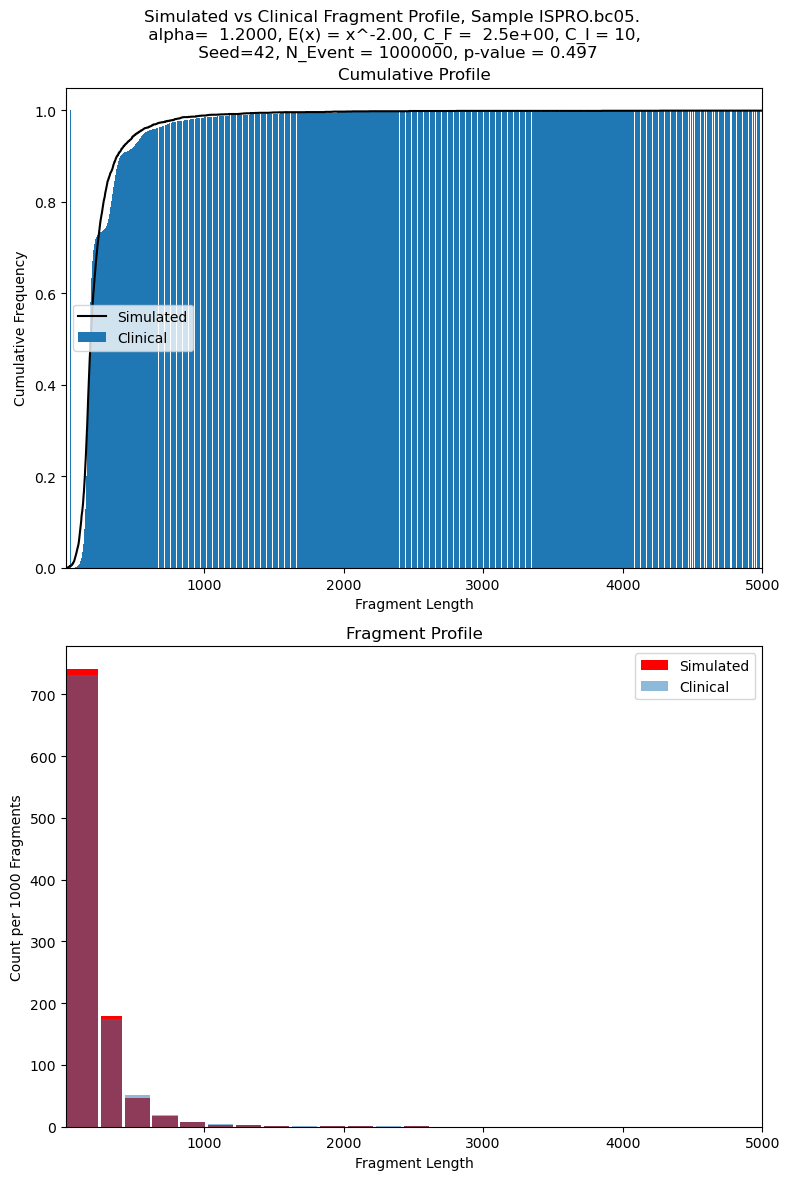

In [31]:
p_value = KS_p
sim_len_list, sim_count_list = np.unique(sim_list, return_counts=True)
sim_cum_count = sim_count_list.cumsum()
x_max = int(x_max)
clin_max = int(clin_max)
up_bound = np.percentile(sim_mat, 75, axis=0)
low_bound = np.percentile(sim_mat, 25, axis=0)
mean = np.mean(sim_mat, axis=0)
sim_cdf = x.cum_dist(x_max,x_max)
fig, ax = plt.subplots(2,figsize=(8,12), dpi=100)

#############Plotting New Density Against Mean Density over Time ############################
ax[0].bar(clin_length_full,np.cumsum(clin_freq_full)/np.sum(clin_freq_full), label=f"Clinical", width=0.9)
ax[0].plot(np.linspace(0,x_max,x_max+1),sim_cdf/sim_cdf[-1], label = f"Simulated", color='k')
#ax[0].plot(range(x_max+1),sim_cdf-clin_ccf/clin_ccf[-1], label='Difference')
#ax[0].set_xlim(0,8000)
ax[0].set_xlabel('Fragment Length')
ax[0].set_ylabel('Cumulative Frequency')
ax[0].set_title('Cumulative Profile')
#ax[0].plot(range(x_max+1),up_bound, linestyle='-.', alpha=0.5, color = '0.8',label='75-th %')
#ax[0].plot(range(x_max+1),low_bound, linestyle='-.', alpha=0.5, color = '0.8',label='25-th %')
#ax[0].fill_between(range(x_max+1), low_bound, up_bound, alpha=0.2, color = '0.5')      
ax[0].legend()
ax[1].set_xlim(10,5000)
ax[0].set_xlim(10,5000)
ax[1].bar(sim_len_list,sim_count_list/sim_cum_count[-1]*1000, label = f"Simulated",color='r', width=np.diff(gDNA_bin)[:len(sim_len_list)]*0.9)
ax[1].bar(clin_length,clin_count/np.sum(clin_count)*1000, label=f"Clinical", width=np.diff(gDNA_bin)*0.9, alpha=0.5)
#ax[1].bar(np.linspace(0,x_max,100), np.diff(sim_cdf)/sim_cdf[-1]*1000, label=f'Simulated', color='k', width=100)
#ax[1].plot(range(x_max),np.diff(mean)*1000, linestyle='-.', alpha=0.5, color = '0.8',label='Mean')
#ax[0].set_xlim(0,x_max)
ax[1].set_xlabel('Fragment Length')
ax[1].set_ylabel('Count per 1000 Fragments')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].set_title(f'Fragment Profile')
ax[1].legend()
fig.suptitle(f'Simulated vs Clinical Fragment Profile, Sample ISPRO.bc05. \n alpha= {alpha_f: .4f}, E(x) = x^{alpha_e:.2f}, C_F = {frag_speed: .1e}, C_I = {imm_rate}, \n Seed={seed}, N_Event = {N_event}, p-value ={p_value: .3f}')
fig.tight_layout()
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.eps')
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'.png')
fig.savefig('../Clinical Data Analysis/Trials/ISPRObc05_gDNA_full_cum.pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


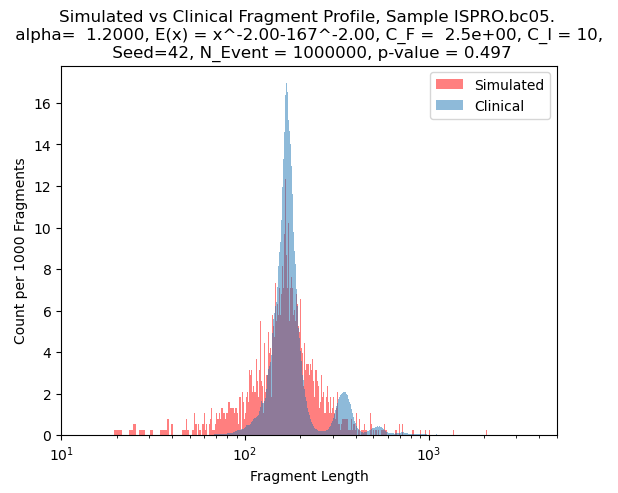

In [32]:
p_value = KS_p
sim_len_list, sim_count_list = np.unique(sim_list, return_counts=True)
sim_cum_count = sim_count_list.cumsum()
x_max = int(x_max)
clin_max = int(clin_max)
up_bound = np.percentile(sim_mat, 75, axis=0)
low_bound = np.percentile(sim_mat, 25, axis=0)
mean = np.mean(sim_mat, axis=0)
sim_cdf = x.cum_dist(x_max,x_max)


#############Plotting New Density Against Mean Density over Time ############################
plt.xlim(10,5000)
plt.bar(np.linspace(0,x_max,x_max+1)[1:],np.diff(sim_cdf)/sim_cdf[-1]*1000, label = f"Simulated",color='r', alpha=0.5, width=1)
plt.bar(clin_length_full,clin_freq_full/np.sum(clin_freq_full)*1000, label=f"Clinical", width=1, alpha=0.5)
#ax[1].set_yscale('log')
plt.xscale('log')
#ax[1].bar(np.linspace(0,x_max,100), np.diff(sim_cdf)/sim_cdf[-1]*1000, label=f'Simulated', color='k', width=100)
#ax[1].plot(range(x_max),np.diff(mean)*1000, linestyle='-.', alpha=0.5, color = '0.8',label='Mean')
#ax[0].set_xlim(0,x_max)
plt.xlabel('Fragment Length')
plt.ylabel('Count per 1000 Fragments')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
plt.legend()
plt.title(f'Simulated vs Clinical Fragment Profile, Sample ISPRO.bc05. \n alpha= {alpha_f: .4f}, E(x) = x^{alpha_e:.2f}-{B_ex}^{alpha_e: .2f}, C_F = {frag_speed: .1e}, C_I = {imm_rate}, \n Seed={seed}, N_Event = {N_event}, p-value ={p_value: .3f}')
fig.tight_layout()
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'_full.eps')
fig.savefig('../Clinical Data Analysis/Trials/'+str(time)+'_full.png')
fig.savefig('../Clinical Data Analysis/Trials/ISPRObc05_gDNA_full.pdf')